# Installations

In [1]:
# %pip install "opencv-python-headless<4.3"
# %pip install cellpose
# %pip install cytoself

# %pip install adjustText

# %pip install --upgrade scikit-image

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random
from model import load_data, get_analytics
from cytoself_custom import plot_umap, calc_umap_embvec, plot_feature_spectrum_from_image
from synthetic_multiplexing import multiplex
from metrics import plot_boostrapping, calc_bootstrapping, plot_metrics
from explainability import generate_images, plot_clusters_distance_heatmap
from utils import get_colors_dict
from sklearn.metrics.pairwise import euclidean_distances
import os

import config
from config import SEED, PRETRAINED_MODEL_PATH, MODEL_PATH, METRICS_FOLDER, METRICS_MATCH_PATH, METRICS_RANDOM_PATH

np.random.seed(SEED)
random.seed(SEED)

%reload_ext autoreload
%autoreload 2
%aimport

In /home/labs/hornsteinlab/noamru/anaconda3/envs/cytoself4/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/labs/hornsteinlab/noamru/anaconda3/envs/cytoself4/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/labs/hornsteinlab/noamru/anaconda3/envs/cytoself4/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/labs/hornsteinlab/noamru/anaconda3/envs/cytoself4/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was dep

Modules to reload:
all-except-skipped

Modules to skip:



In [3]:
import logging
log_file_path = f"./logs/figures_log_noam.log"
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(levelname)s %(message)s",
                    datefmt="%Y-%m-%d %H:%M:%S",
                    handlers=[
        logging.FileHandler(log_file_path),
        logging.StreamHandler()
    ])

logging.info("init")

2022-11-20 10:09:03 INFO init


# Figure 2

In [4]:
input_folders = ["./data/processed/220629_neurons_12markers_unstressed",
                 "./data/processed/220707_neurons_12markers_stressed",
                 "./data/processed/220814_neurons",
                 "./data/processed/220818_neurons",
                 "./data/processed/220831_neurons",
                 "./data/processed/220908",
                 "./data/processed/220914"]

cytoself_model_path = PRETRAINED_MODEL_PATH

groups_terms = [config.TERM_WT,config.TERM_TDP43, config.TERM_FUS, config.TERM_OPTN, config.TERM_TBK1]
markers = ["CD41", "CLTC", "FMRP", "G3BP1", "KIF5A", "NONO", "Phalloidin",
           "PSD95", "PURA", "SQSTM1", "TDP43", "TIA1", "NEMO", "DCP1A",
           "TOMM20", "ANXA11", "Calreticulin", "FUS", "LAMP1",
           "mitotracker", "Nucleolin", "SNCA",
           "GM130", "PEX14", "PML"] #Without "lysotracker" and "Syto12"
model_X_train_batches=["./data/processed/220629_neurons_12markers_unstressed",
                         "./data/processed/220707_neurons_12markers_stressed"]


In [5]:
# # Cytoself
# images, labels, labels_changepoints, markers_order = load_data(input_folders, markers=markers,condition_l=True,
#                                                                type_l=True,verbose=False,split_by_set=False,
#                                                                cell_lines_include=["WT"])
# labels_s = pd.Series(labels.reshape(-1,))
# for m in markers:
#     markers_indexes = labels_s[labels_s.str.contains(m)].index
#     images_subset = images[markers_indexes]
#     labels_subset = labels[markers_indexes]
#     colors_dict = get_colors_dict(labels_subset)
#     analytics_cytoself = get_analytics(images_subset, labels_subset, model_path=cytoself_model_path)
#     umap_vec, _ = plot_umap(analytics_cytoself, titles='Cytoself',colors_dict=colors_dict,
#                            output_filename=f"cytoself_{m}_WT",s=50)


In [6]:
# # Cytoself - test of model X trained batches
# images, labels, labels_changepoints, markers_order = load_data(input_folders, markers=markers,condition_l=True,
#                                                                type_l=True,verbose=False,split_by_set=True,set_type='test',
#                                                                split_by_set_include_batch=model_X_train_batches,
#                                                                cell_lines_include=["WT"])
# labels_s = pd.Series(labels.reshape(-1,))
# for m in markers:
#     markers_indexes = labels_s[labels_s.str.contains(m)].index
#     images_subset = images[markers_indexes]
#     labels_subset = labels[markers_indexes]
#     colors_dict = get_colors_dict(labels_subset)
#     analytics_cytoself = get_analytics(images_subset, labels_subset, model_path=cytoself_model_path)
#     umap_vec, _ = plot_umap(analytics_cytoself, titles='Cytoself_(traind batches of model X = only test)',colors_dict=colors_dict,
#                            output_filename=f"cytoself_{m}_WT_(traind batches of model X= only test)",s=50)

In [7]:
# # Model 10 #1
# images, labels, labels_changepoints, markers_order = load_data(["./data/processed/220629_neurons_12markers_unstressed",
#                                                                  "./data/processed/220707_neurons_12markers_stressed"], 
#                                                                markers=markers,
#                                                                condition_l=True, type_l=True,
#                                                                split_by_set=True,
#                                                                set_type = 'test', cell_lines_include=["WT"],verbose=False)
# labels_s = pd.Series(labels.reshape(-1,))
# for m in markers:
#     markers_indexes = labels_s[labels_s.str.contains(m)].index
#     images_subset = images[markers_indexes]
#     labels_subset = labels[markers_indexes]
#     colors_dict = get_colors_dict(labels_subset)
#     analytics_neuroself_X= get_analytics(images_subset, labels_subset, model_path="./models/MODEL10_model_weights.0030.h5")
#     umap_vec, _ = plot_umap(analytics_neuroself_X, titles='Neuroself 10 on train batches', s=50,colors_dict=colors_dict,
#                            output_filename=f"model10_{m}_WT_(only trained batches)")

In [8]:
# # Model 10 #2
# model_ten_test_batches=[batch for batch in input_folders if batch not in model_X_train_batches]

# images, labels, labels_changepoints, markers_order = load_data(model_ten_test_batches, 
#                                                                markers=markers,
#                                                                condition_l=True, type_l=True,
#                                                                split_by_set=False,
#                                                                cell_lines_include=["WT"],verbose=False)
# labels_s = pd.Series(labels.reshape(-1,))
# for m in markers:
#     markers_indexes = labels_s[labels_s.str.contains(m)].index
#     images_subset = images[markers_indexes]
#     labels_subset = labels[markers_indexes]
#     colors_dict = get_colors_dict(labels_subset)
#     analytics_neuroself_X= get_analytics(images_subset, labels_subset, model_path="./models/MODEL10_model_weights.0030.h5")
#     umap_vec, _ = plot_umap(analytics_neuroself_X, colors_dict=colors_dict, s=50,
#                            titles='Neuroself 10 on all batches (without trained batches)',
#                             output_filename=f"model10_{m}_WT_(without trained batches)")


In [9]:
## Model 10 #3
# images, labels, labels_changepoints, markers_order = load_data(input_folders, 
#                                                                markers=markers,
#                                                                condition_l=True, type_l=True,
#                                                                split_by_set=True, set_type='test',
#                                                                cell_lines_include=["WT"],verbose=False,
#                                                                split_by_set_include_batch=model_X_train_batches)
# labels_s = pd.Series(labels.reshape(-1,))
# for m in markers:
#     markers_indexes = labels_s[labels_s.str.contains(m)].index
#     images_subset = images[markers_indexes]
#     labels_subset = labels[markers_indexes]
#     colors_dict = get_colors_dict(labels_subset)
#     analytics_neuroself_X= get_analytics(images_subset, labels_subset, model_path="./models/MODEL10_model_weights.0030.h5")
#     umap_vec, _ = plot_umap(analytics_neuroself_X, colors_dict=colors_dict, s=50,
#                             output_filename=f"model10_{m}_WT_(traind batches = only test)",
#                            titles='Neuroself 10 on all batches (traind batches = only test)')

#########################################################
########### Splitting by set! (test) #############
#########################################################
(1467, 100, 100, 2) (1467, 1)
X, y:
(76, 100, 100, 2) (76,)
CD41_WT_unstressed    39
CD41_WT_stressed      37
dtype: int64
Creating the model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2022-11-20 10:09:24 WARNING From /home/labs/hornsteinlab/noamru/anaconda3/envs/cytoself4/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2022-11-20 10:09:34 WARNING From /home/labs/hornsteinlab/noamru/anaconda3/envs/cytoself4/lib/python3.7/site-packages/tensorflow_core/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




All files will be saved at model_outputs/


Loading weights


2022-11-20 10:09:41.109572: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/share/lsf/10.1/linux3.10-glibc2.17-x86_64/lib
2022-11-20 10:09:41.109633: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-20 10:09:41.109677: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cn155.wexac.weizmann.ac.il): /proc/driver/nvidia/version does not exist
2022-11-20 10:09:41.110884: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-11-20 10:09:41.254002: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1995330000 Hz
2022-11-20 10:09:41.262575: I tensorflow/compiler/xla/service/

./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['CD41_WT_stressed' 'CD41_WT_unstressed']
Inferring embedding vectors...
76/76 [==============================] - 10s 130ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:09:58 2022 Construct fuzzy simplicial set
Sun Nov 20 10:09:59 2022 Finding Nearest Neighbors
Sun Nov 20 10:10:02 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:10:05 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:10:07 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00,  9.71it/s]


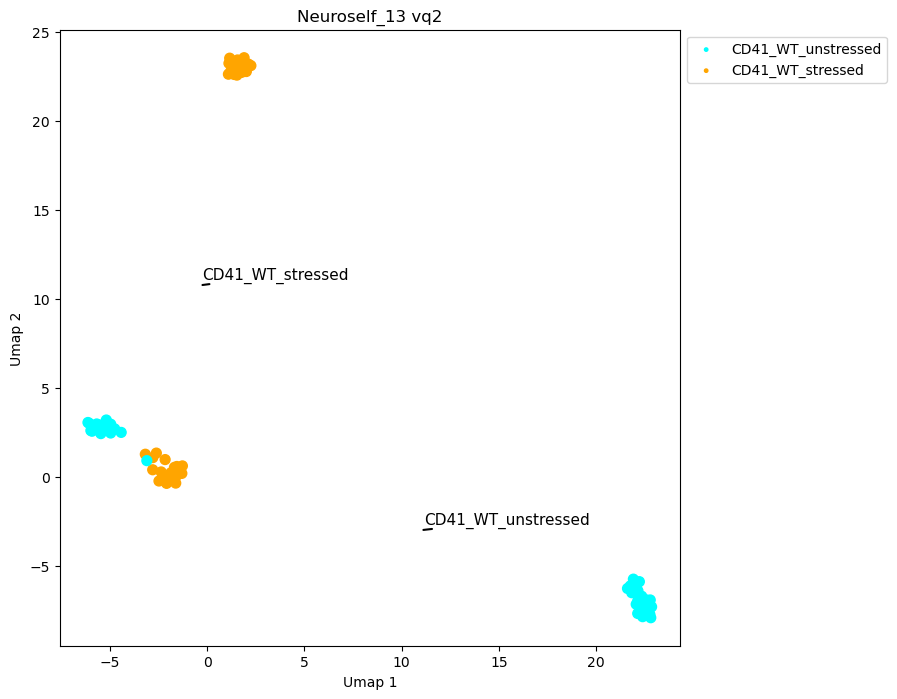

X, y:
(74, 100, 100, 2) (74,)
CLTC_WT_unstressed    42
CLTC_WT_stressed      32
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['CLTC_WT_stressed' 'CLTC_WT_unstressed']
Inferring embedding vectors...
74/74 [==============================] - 10s 136ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:10:41 2022 Construct fuzzy simplicial set
Sun Nov 20 10:10:41 2022 Finding Nearest Neighbors
Sun Nov 20 10:10:41 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:10:41 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:10:42 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 83.92it/s]


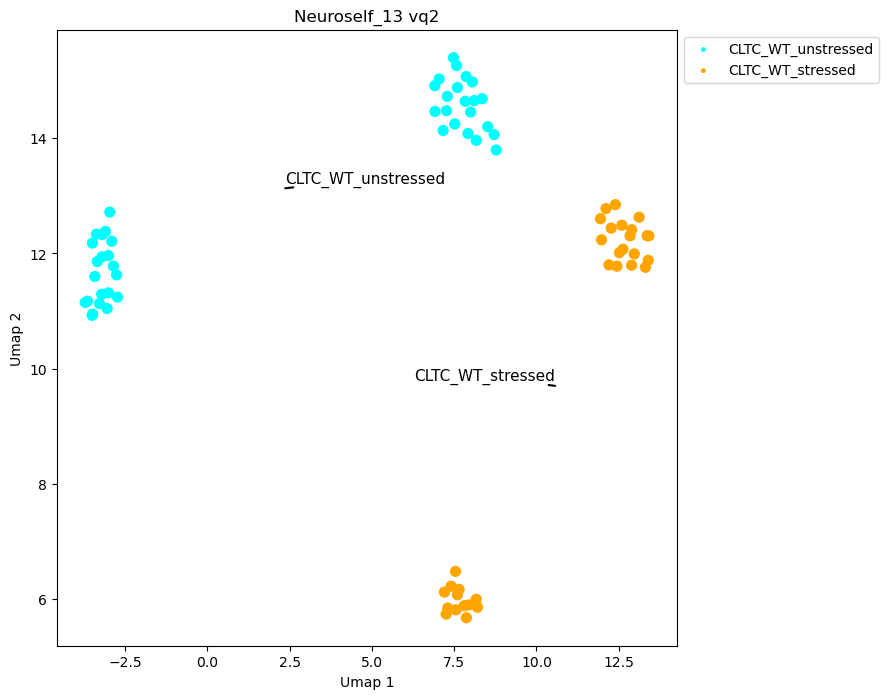

X, y:
(70, 100, 100, 2) (70,)
FMRP_WT_stressed      40
FMRP_WT_unstressed    30
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['FMRP_WT_stressed' 'FMRP_WT_unstressed']
Inferring embedding vectors...
70/70 [==============================] - 10s 149ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:11:20 2022 Construct fuzzy simplicial set
Sun Nov 20 10:11:20 2022 Finding Nearest Neighbors
Sun Nov 20 10:11:20 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:11:20 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:11:21 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 90.46it/s]


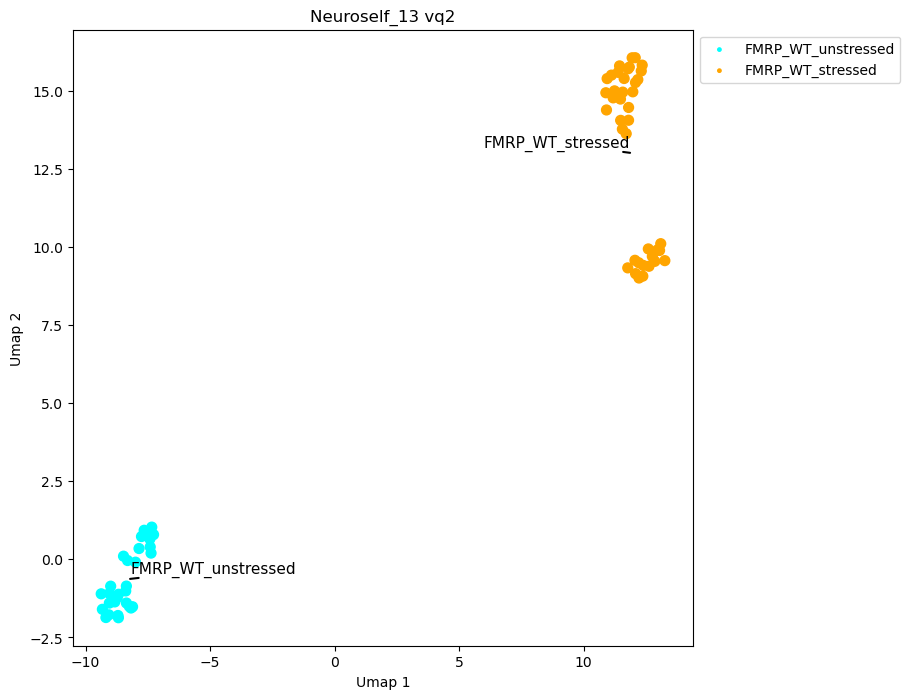

X, y:
(68, 100, 100, 2) (68,)
G3BP1_WT_unstressed    35
G3BP1_WT_stressed      33
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['G3BP1_WT_stressed' 'G3BP1_WT_unstressed']
Inferring embedding vectors...
68/68 [==============================] - 11s 163ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:12:02 2022 Construct fuzzy simplicial set
Sun Nov 20 10:12:02 2022 Finding Nearest Neighbors
Sun Nov 20 10:12:02 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:12:02 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:12:04 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 88.35it/s]


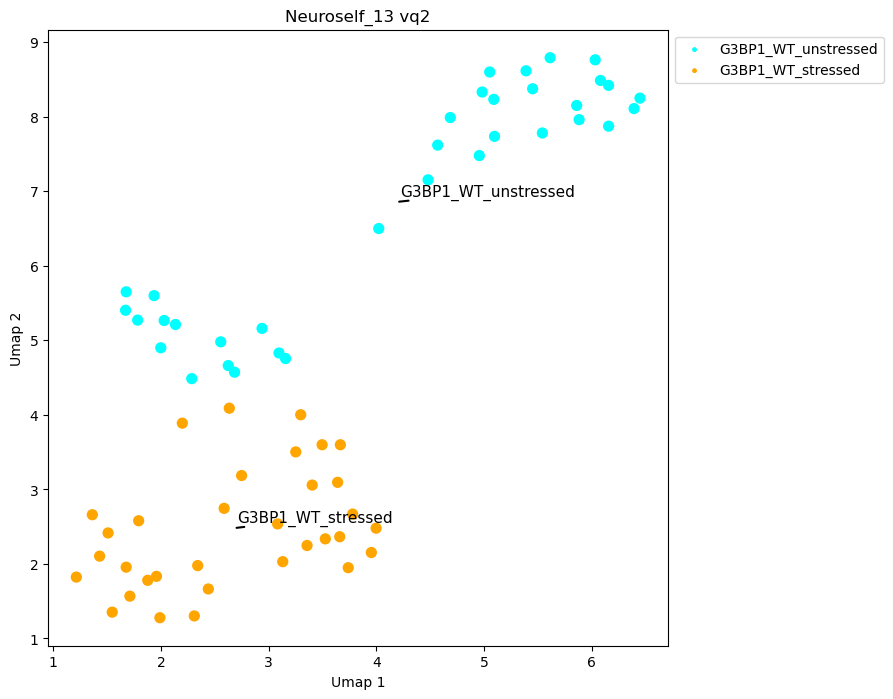

X, y:
(68, 100, 100, 2) (68,)
KIF5A_WT_unstressed    35
KIF5A_WT_stressed      33
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['KIF5A_WT_stressed' 'KIF5A_WT_unstressed']
Inferring embedding vectors...
68/68 [==============================] - 12s 177ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:12:49 2022 Construct fuzzy simplicial set
Sun Nov 20 10:12:49 2022 Finding Nearest Neighbors
Sun Nov 20 10:12:49 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:12:49 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:12:50 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 92.94it/s]


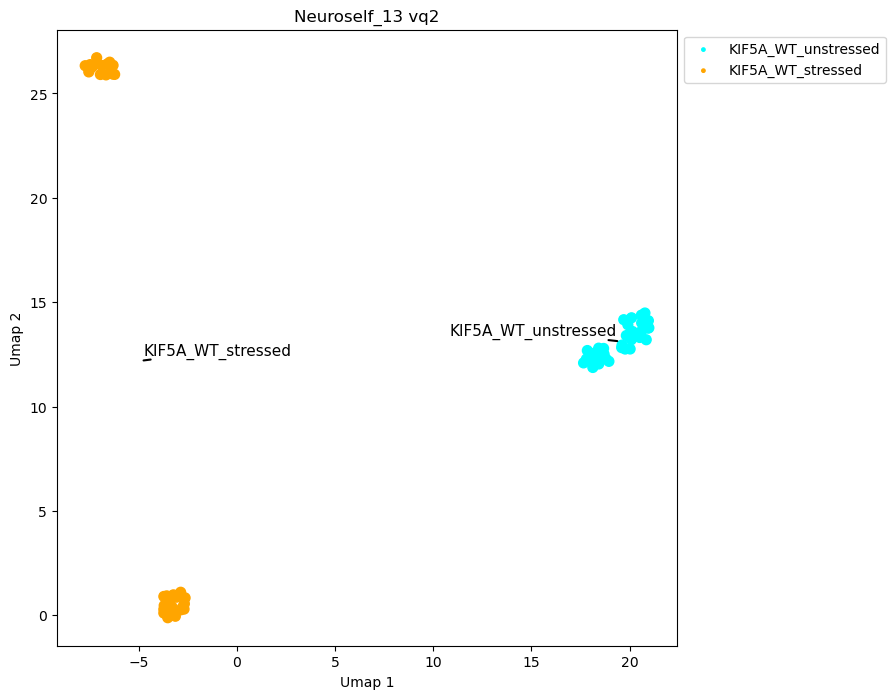

X, y:
(76, 100, 100, 2) (76,)
NONO_WT_unstressed    39
NONO_WT_stressed      37
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['NONO_WT_stressed' 'NONO_WT_unstressed']
Inferring embedding vectors...
76/76 [==============================] - 14s 179ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:13:42 2022 Construct fuzzy simplicial set
Sun Nov 20 10:13:42 2022 Finding Nearest Neighbors
Sun Nov 20 10:13:42 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:13:42 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:13:43 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 89.20it/s]


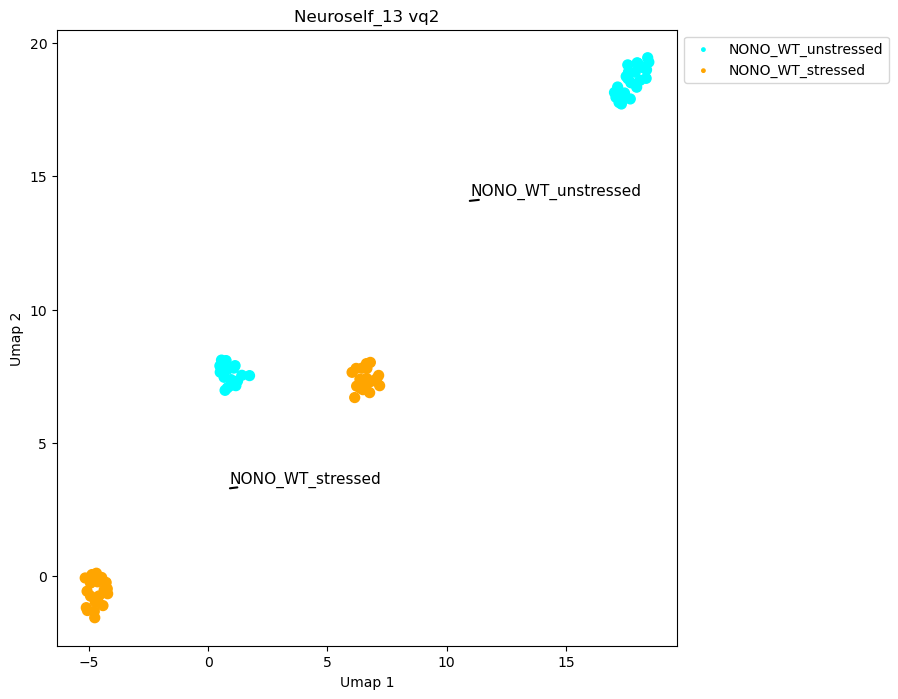

X, y:
(107, 100, 100, 2) (107,)
Phalloidin_WT_unstressed    58
Phalloidin_WT_stressed      49
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['Phalloidin_WT_stressed' 'Phalloidin_WT_unstressed']
Inferring embedding vectors...
107/107 [==============================] - 18s 171ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:14:42 2022 Construct fuzzy simplicial set
Sun Nov 20 10:14:42 2022 Finding Nearest Neighbors
Sun Nov 20 10:14:42 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:14:42 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:14:43 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 82.15it/s]


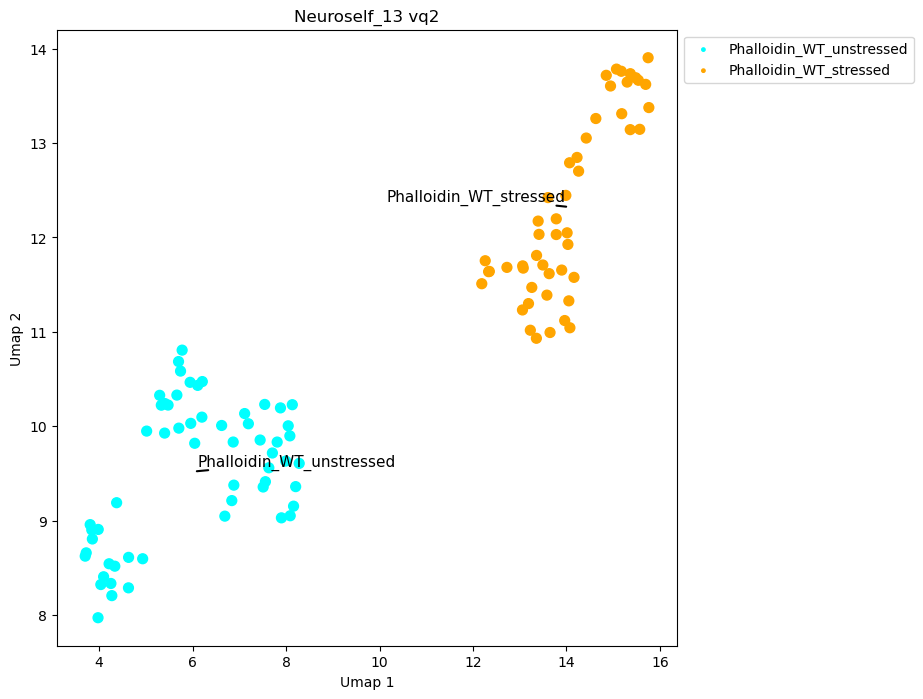

X, y:
(74, 100, 100, 2) (74,)
PSD95_WT_unstressed    42
PSD95_WT_stressed      32
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['PSD95_WT_stressed' 'PSD95_WT_unstressed']
Inferring embedding vectors...
74/74 [==============================] - 15s 208ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:15:44 2022 Construct fuzzy simplicial set
Sun Nov 20 10:15:44 2022 Finding Nearest Neighbors
Sun Nov 20 10:15:44 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:15:44 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:15:45 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 89.46it/s]


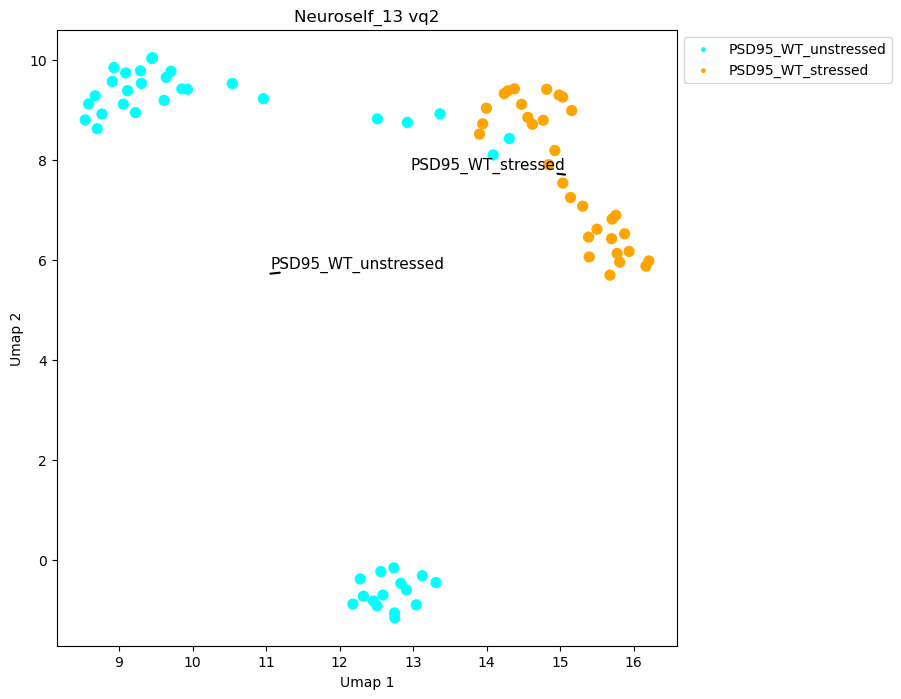

X, y:
(70, 100, 100, 2) (70,)
PURA_WT_stressed      40
PURA_WT_unstressed    30
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['PURA_WT_stressed' 'PURA_WT_unstressed']
Inferring embedding vectors...
70/70 [==============================] - 16s 228ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:16:49 2022 Construct fuzzy simplicial set
Sun Nov 20 10:16:49 2022 Finding Nearest Neighbors
Sun Nov 20 10:16:49 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:16:49 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:16:50 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 87.97it/s]


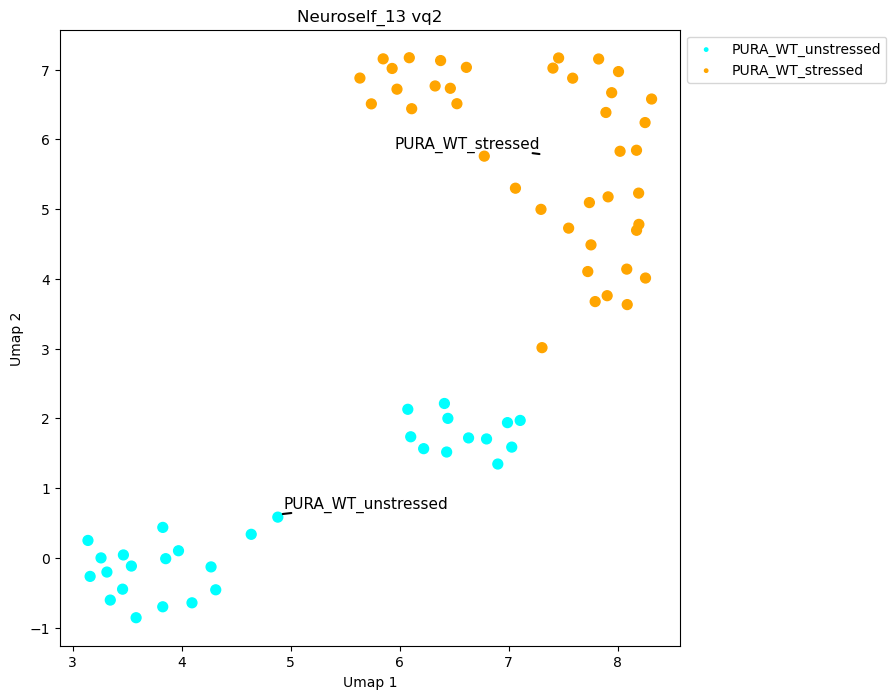

X, y:
(70, 100, 100, 2) (70,)
SQSTM1_WT_stressed      40
SQSTM1_WT_unstressed    30
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['SQSTM1_WT_stressed' 'SQSTM1_WT_unstressed']
Inferring embedding vectors...
70/70 [==============================] - 17s 241ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:17:58 2022 Construct fuzzy simplicial set
Sun Nov 20 10:17:58 2022 Finding Nearest Neighbors
Sun Nov 20 10:17:58 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:17:58 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:18:00 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 89.64it/s]


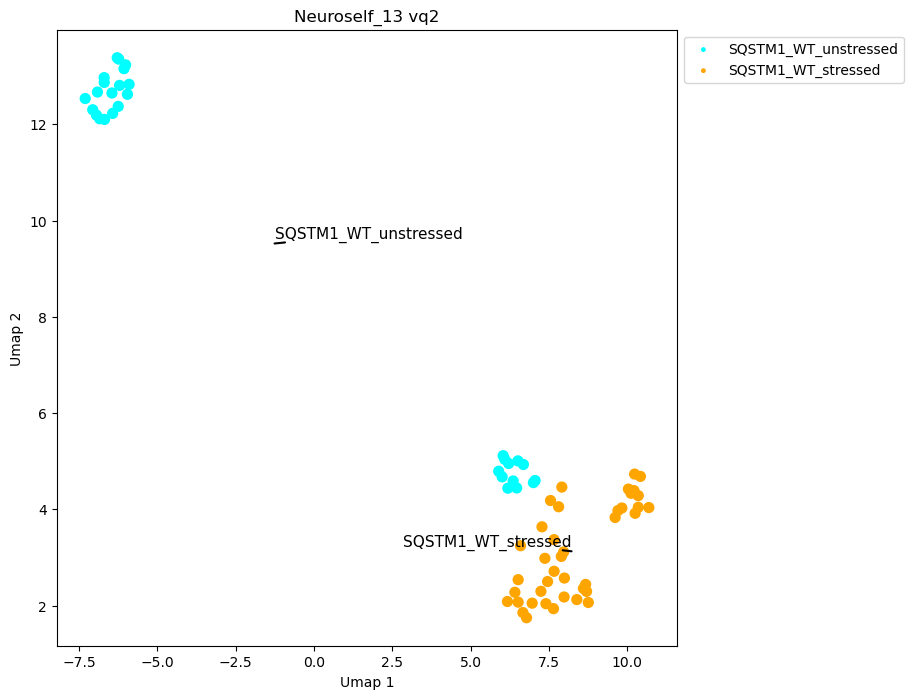

X, y:
(76, 100, 100, 2) (76,)
TDP43_WT_unstressed    39
TDP43_WT_stressed      37
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['TDP43_WT_stressed' 'TDP43_WT_unstressed']
Inferring embedding vectors...
76/76 [==============================] - 19s 245ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:19:13 2022 Construct fuzzy simplicial set
Sun Nov 20 10:19:13 2022 Finding Nearest Neighbors
Sun Nov 20 10:19:13 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:19:13 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:19:15 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 84.59it/s]


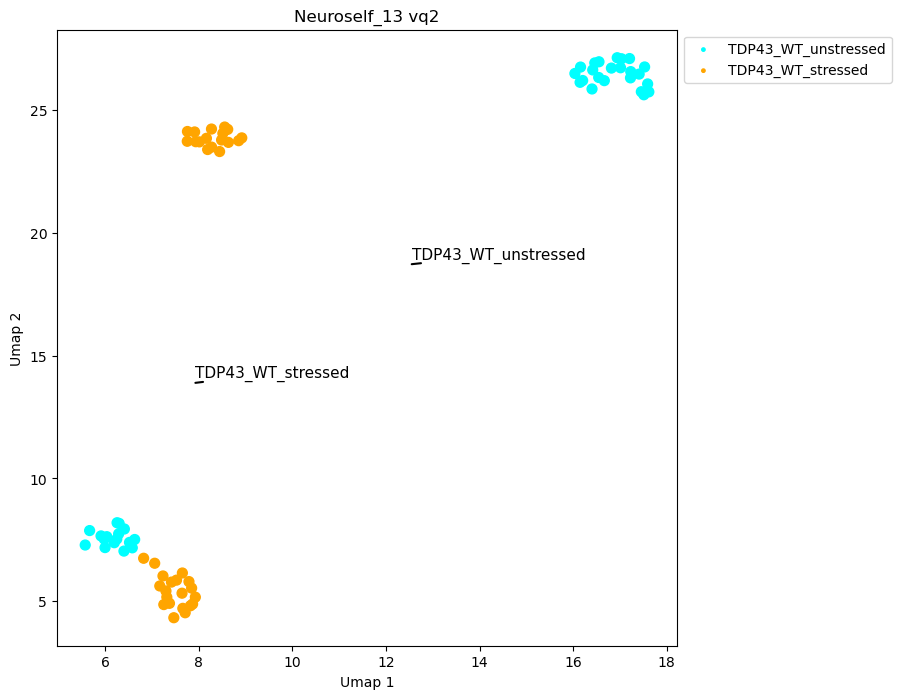

X, y:
(68, 100, 100, 2) (68,)
TIA1_WT_unstressed    35
TIA1_WT_stressed      33
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['TIA1_WT_stressed' 'TIA1_WT_unstressed']
Inferring embedding vectors...
68/68 [==============================] - 19s 276ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:20:33 2022 Construct fuzzy simplicial set
Sun Nov 20 10:20:33 2022 Finding Nearest Neighbors
Sun Nov 20 10:20:33 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:20:33 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:20:34 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 84.86it/s]


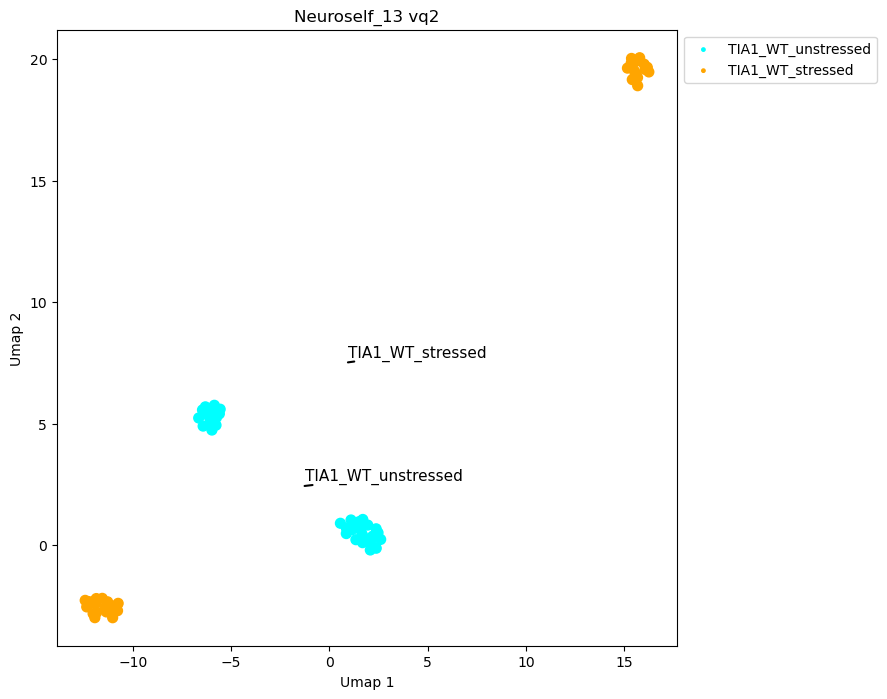

X, y:
(31, 100, 100, 2) (31,)
NEMO_WT_unstressed    19
NEMO_WT_stressed      12
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['NEMO_WT_stressed' 'NEMO_WT_unstressed']
Inferring embedding vectors...
31/31 [==============================] - 16s 517ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:21:53 2022 Construct fuzzy simplicial set
Sun Nov 20 10:21:53 2022 Finding Nearest Neighbors
Sun Nov 20 10:21:53 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:21:53 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:21:56 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 94.26it/s]


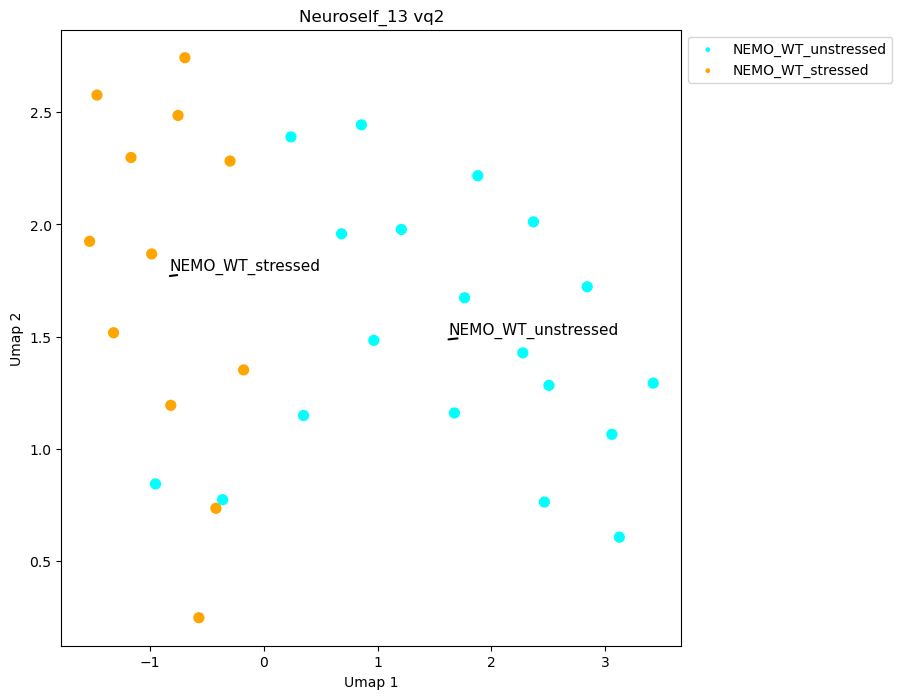

X, y:
(31, 100, 100, 2) (31,)
DCP1A_WT_unstressed    19
DCP1A_WT_stressed      12
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['DCP1A_WT_stressed' 'DCP1A_WT_unstressed']
Inferring embedding vectors...
31/31 [==============================] - 17s 550ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:23:19 2022 Construct fuzzy simplicial set
Sun Nov 20 10:23:19 2022 Finding Nearest Neighbors
Sun Nov 20 10:23:19 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:23:19 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:23:20 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 87.92it/s]


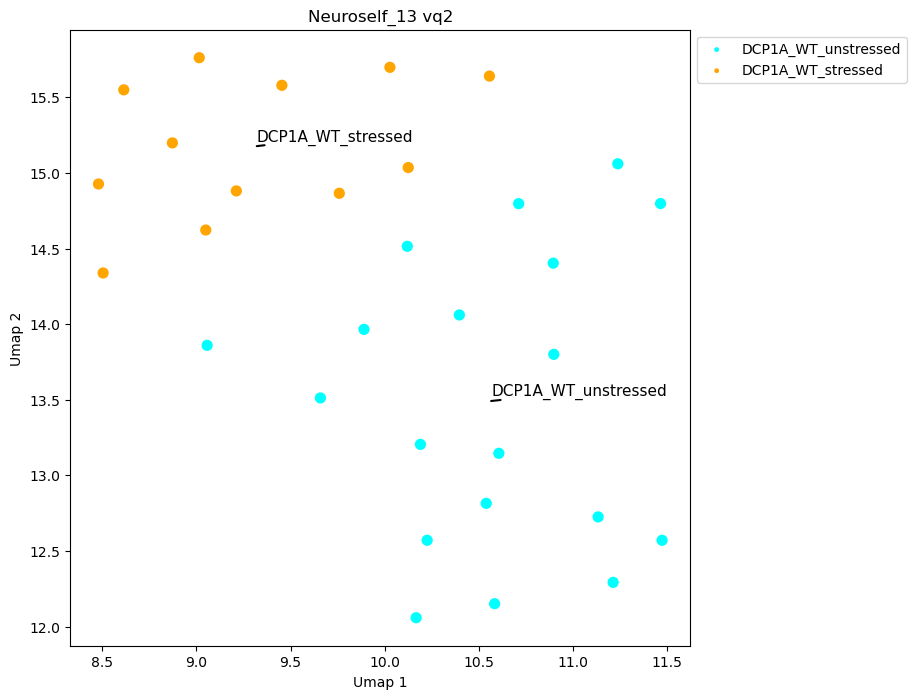

X, y:
(33, 100, 100, 2) (33,)
TOMM20_WT_stressed      17
TOMM20_WT_unstressed    16
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['TOMM20_WT_stressed' 'TOMM20_WT_unstressed']
Inferring embedding vectors...
33/33 [==============================] - 18s 544ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:24:48 2022 Construct fuzzy simplicial set
Sun Nov 20 10:24:48 2022 Finding Nearest Neighbors
Sun Nov 20 10:24:48 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:24:48 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:24:49 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 77.31it/s]


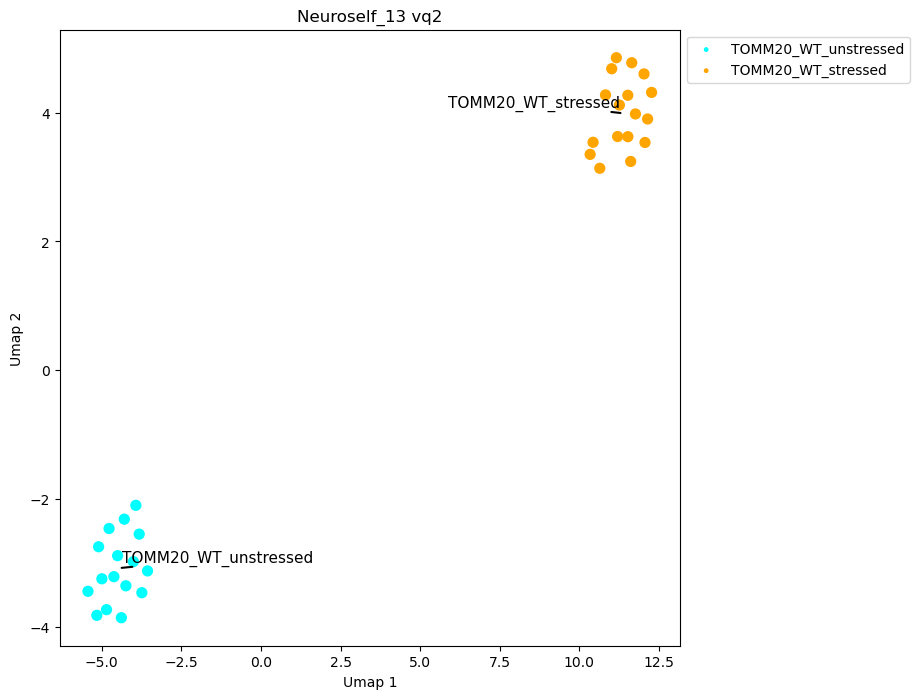

X, y:
(43, 100, 100, 2) (43,)
ANXA11_WT_stressed      22
ANXA11_WT_unstressed    21
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['ANXA11_WT_stressed' 'ANXA11_WT_unstressed']
Inferring embedding vectors...
43/43 [==============================] - 20s 474ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:26:23 2022 Construct fuzzy simplicial set
Sun Nov 20 10:26:23 2022 Finding Nearest Neighbors
Sun Nov 20 10:26:23 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:26:23 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:26:24 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 68.08it/s]


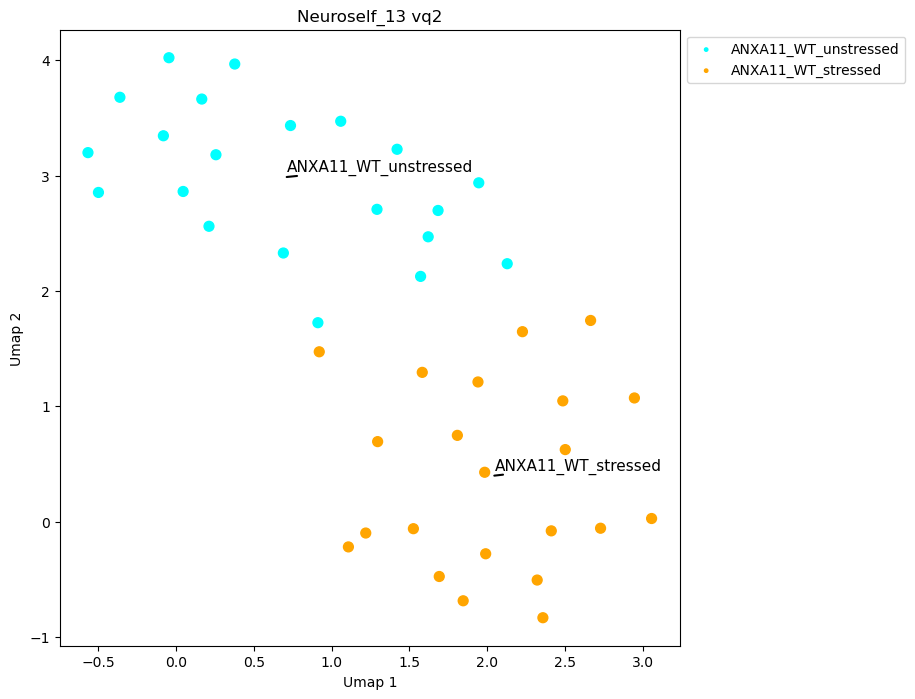

X, y:
(47, 100, 100, 2) (47,)
Calreticulin_WT_stressed      26
Calreticulin_WT_unstressed    21
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['Calreticulin_WT_stressed' 'Calreticulin_WT_unstressed']
Inferring embedding vectors...
47/47 [==============================] - 22s 464ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:28:06 2022 Construct fuzzy simplicial set
Sun Nov 20 10:28:06 2022 Finding Nearest Neighbors
Sun Nov 20 10:28:06 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:28:06 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:28:07 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 82.08it/s]


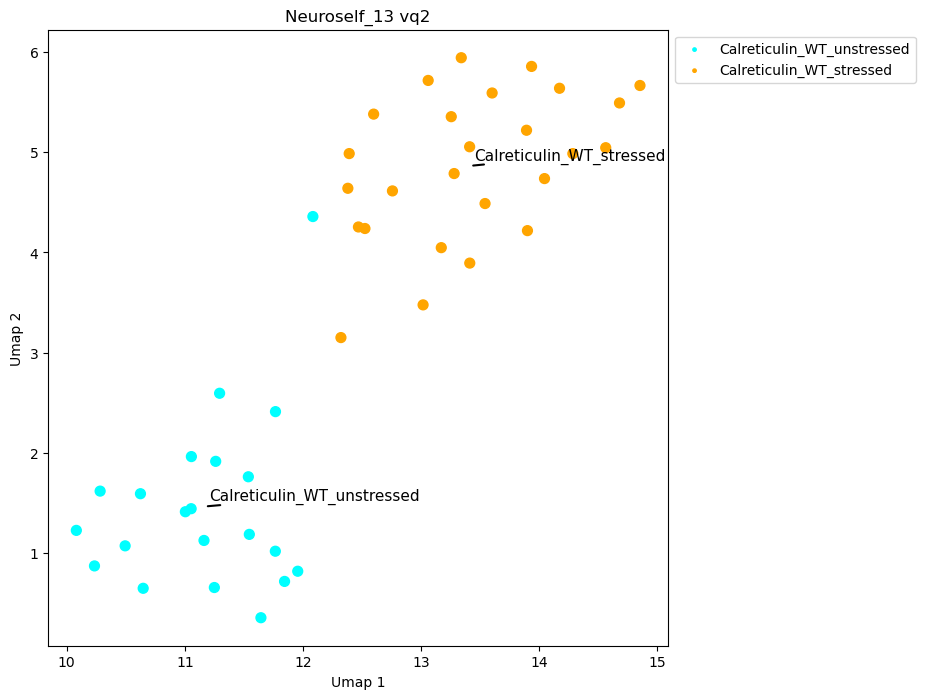

X, y:
(53, 100, 100, 2) (53,)
FUS_WT_unstressed    29
FUS_WT_stressed      24
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['FUS_WT_stressed' 'FUS_WT_unstressed']
Inferring embedding vectors...
53/53 [==============================] - 23s 437ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:29:52 2022 Construct fuzzy simplicial set
Sun Nov 20 10:29:52 2022 Finding Nearest Neighbors
Sun Nov 20 10:29:52 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:29:52 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:29:53 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 83.84it/s]


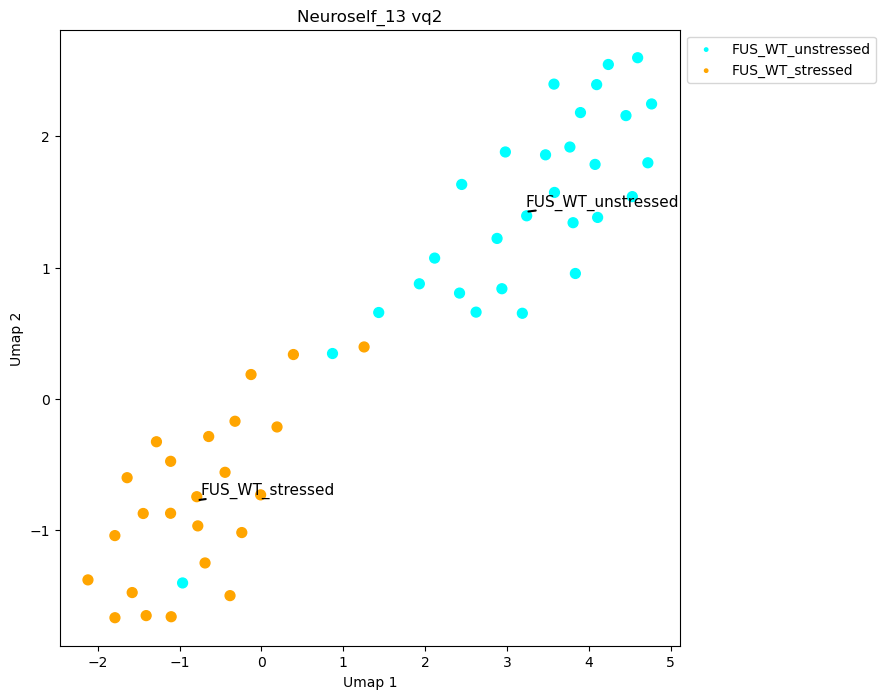

X, y:
(47, 100, 100, 2) (47,)
LAMP1_WT_stressed      26
LAMP1_WT_unstressed    21
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['LAMP1_WT_stressed' 'LAMP1_WT_unstressed']
Inferring embedding vectors...
47/47 [==============================] - 24s 502ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:31:44 2022 Construct fuzzy simplicial set
Sun Nov 20 10:31:44 2022 Finding Nearest Neighbors
Sun Nov 20 10:31:44 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:31:44 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:31:45 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 90.05it/s]


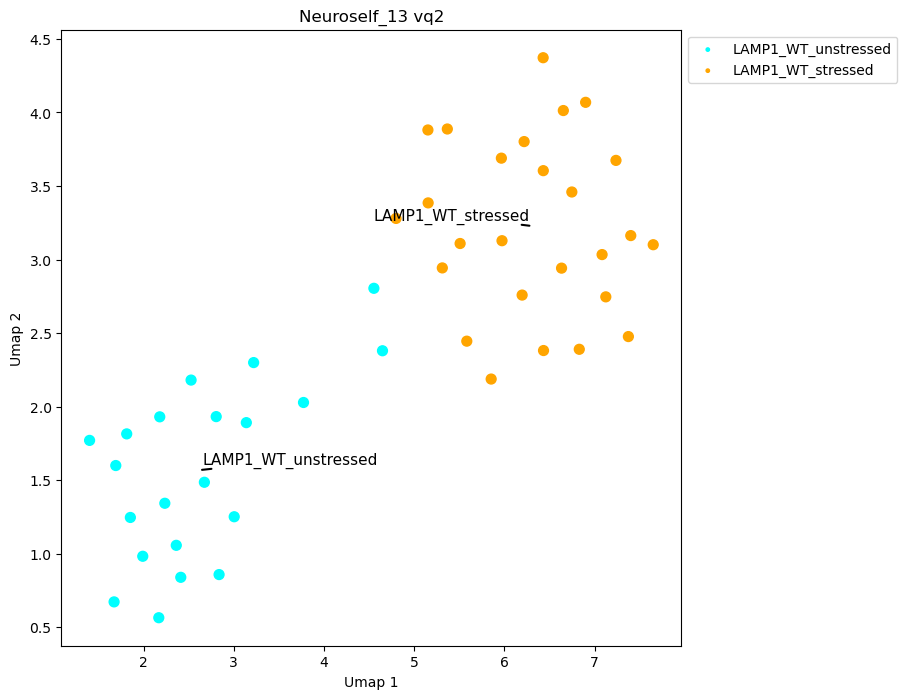

X, y:
(53, 100, 100, 2) (53,)
mitotracker_WT_unstressed    29
mitotracker_WT_stressed      24
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['mitotracker_WT_stressed' 'mitotracker_WT_unstressed']
Inferring embedding vectors...
53/53 [==============================] - 26s 481ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:33:39 2022 Construct fuzzy simplicial set
Sun Nov 20 10:33:39 2022 Finding Nearest Neighbors
Sun Nov 20 10:33:39 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:33:39 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:33:41 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 91.73it/s]


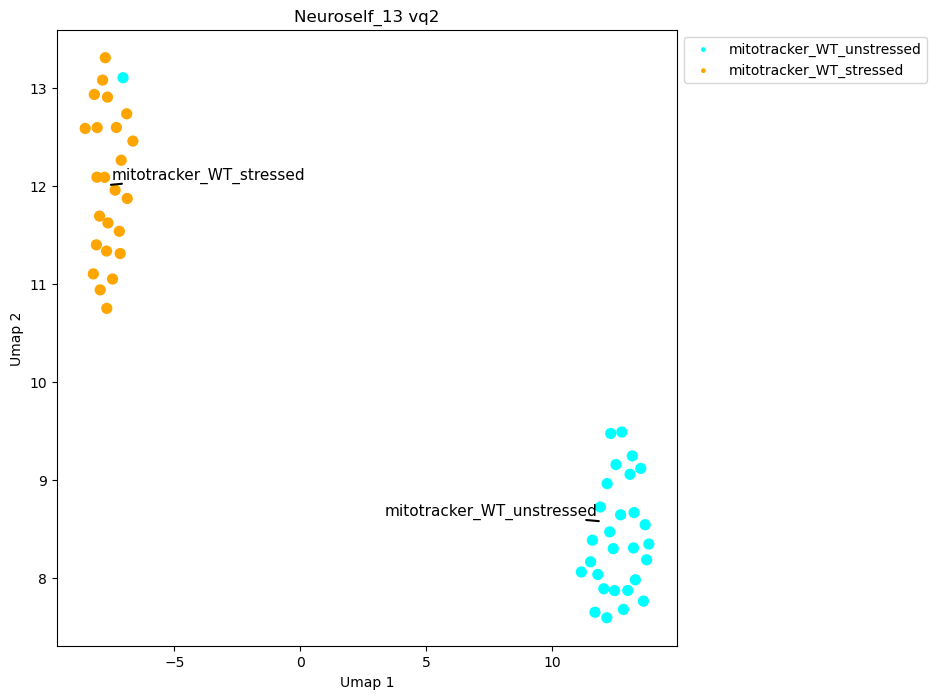

X, y:
(53, 100, 100, 2) (53,)
Nucleolin_WT_unstressed    29
Nucleolin_WT_stressed      24
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['Nucleolin_WT_stressed' 'Nucleolin_WT_unstressed']
Inferring embedding vectors...
53/53 [==============================] - 27s 501ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:35:40 2022 Construct fuzzy simplicial set
Sun Nov 20 10:35:40 2022 Finding Nearest Neighbors
Sun Nov 20 10:35:40 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:35:40 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:35:42 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 84.90it/s]


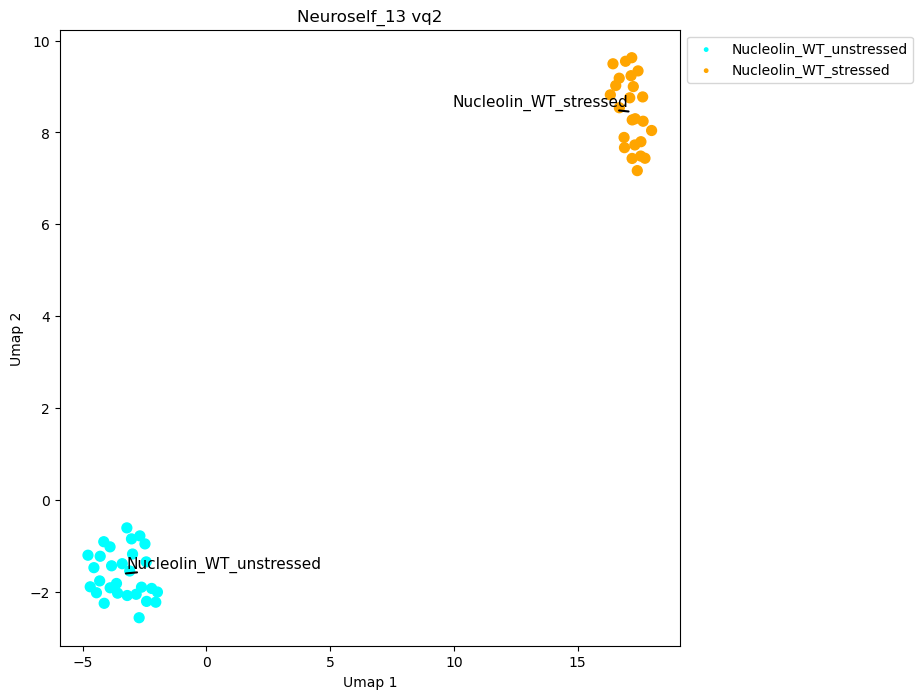

X, y:
(43, 100, 100, 2) (43,)
SNCA_WT_stressed      22
SNCA_WT_unstressed    21
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['SNCA_WT_stressed' 'SNCA_WT_unstressed']
Inferring embedding vectors...
43/43 [==============================] - 26s 616ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:37:44 2022 Construct fuzzy simplicial set
Sun Nov 20 10:37:44 2022 Finding Nearest Neighbors
Sun Nov 20 10:37:44 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:37:44 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:37:45 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 78.24it/s]


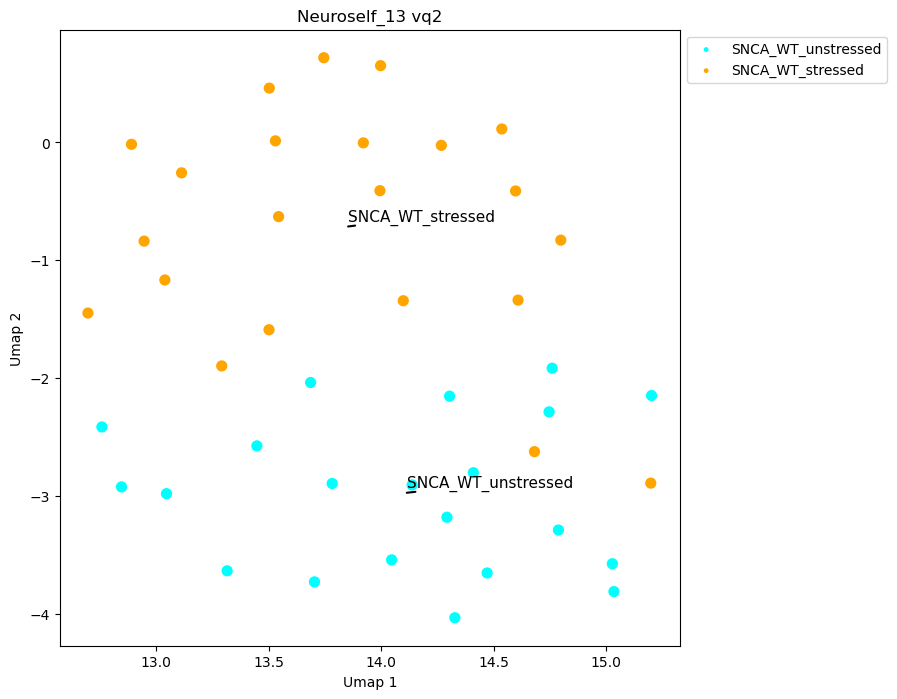

X, y:
(44, 100, 100, 2) (44,)
GM130_WT_unstressed    27
GM130_WT_stressed      17
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['GM130_WT_stressed' 'GM130_WT_unstressed']
Inferring embedding vectors...
44/44 [==============================] - 28s 625ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:39:54 2022 Construct fuzzy simplicial set
Sun Nov 20 10:39:54 2022 Finding Nearest Neighbors
Sun Nov 20 10:39:54 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:39:54 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:39:55 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 85.29it/s]


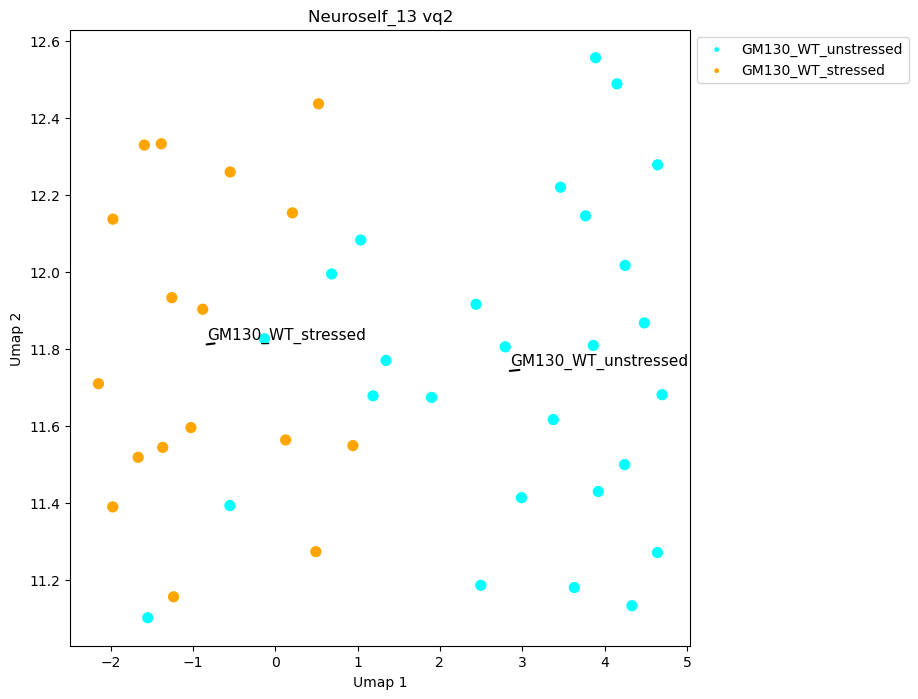

X, y:
(46, 100, 100, 2) (46,)
PEX14_WT_unstressed    24
PEX14_WT_stressed      22
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['PEX14_WT_stressed' 'PEX14_WT_unstressed']
Inferring embedding vectors...
46/46 [==============================] - 29s 639ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:42:11 2022 Construct fuzzy simplicial set
Sun Nov 20 10:42:11 2022 Finding Nearest Neighbors
Sun Nov 20 10:42:11 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:42:11 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:42:13 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 77.90it/s]


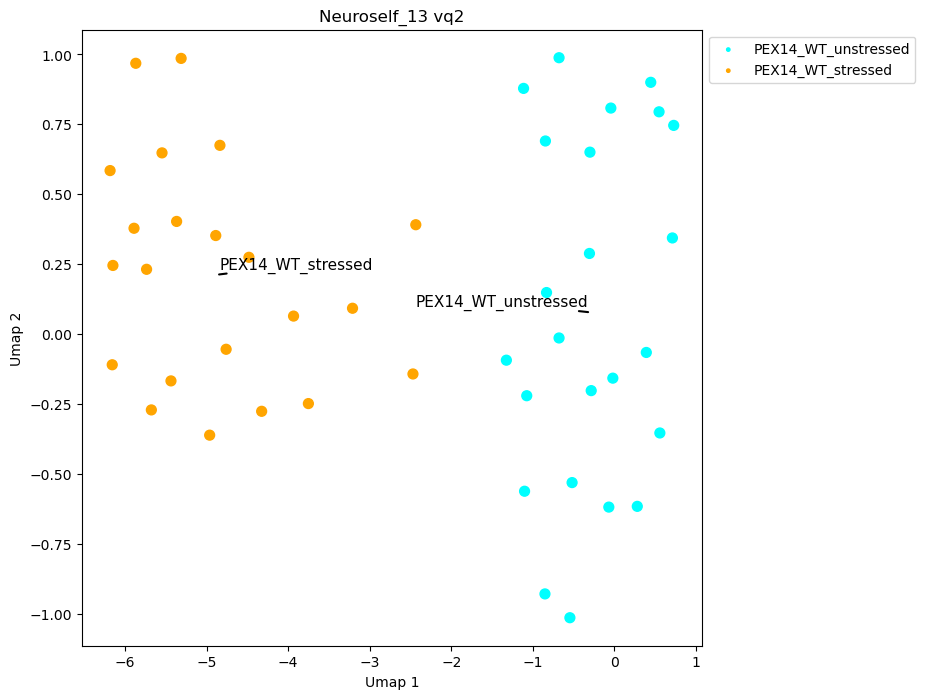

X, y:
(46, 100, 100, 2) (46,)
PML_WT_unstressed    24
PML_WT_stressed      22
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/MODEL13_model_weights.0018.h5
is loaded.
Ground truth:
['PML_WT_stressed' 'PML_WT_unstressed']
Inferring embedding vectors...
46/46 [==============================] - 29s 640ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:44:27 2022 Construct fuzzy simplicial set
Sun Nov 20 10:44:27 2022 Finding Nearest Neighbors
Sun Nov 20 10:44:27 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:44:27 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:44:28 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 84.79it/s]


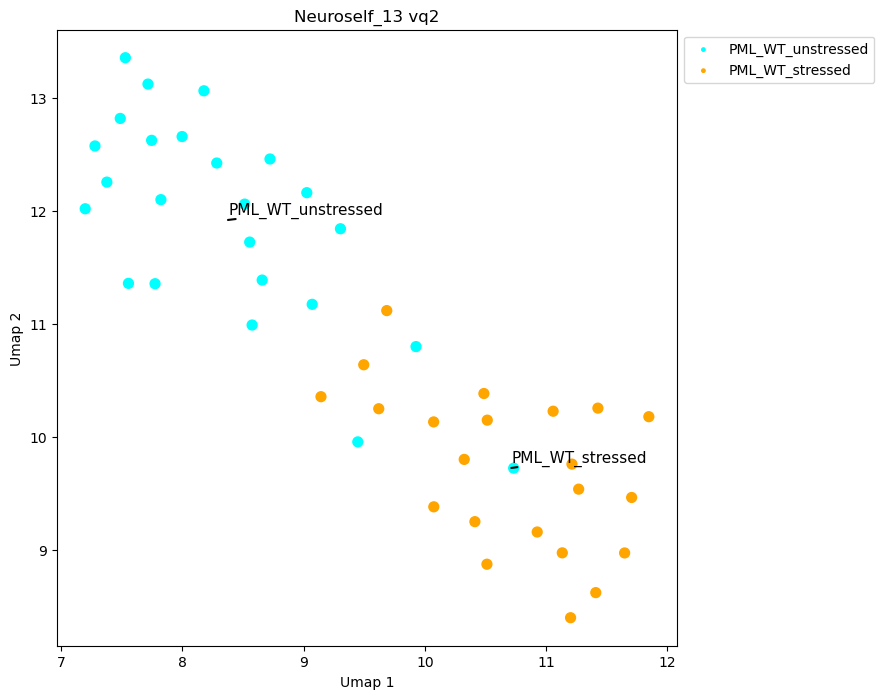

In [10]:
# Model 13
images, labels, labels_changepoints, markers_order = load_data(input_folders, markers=markers,condition_l=True,
                                                               type_l=True,verbose=False,split_by_set=True,
                                                               cell_lines_include=["WT"],set_type='test')
labels_s = pd.Series(labels.reshape(-1,))
for m in markers:
    markers_indexes = labels_s[labels_s.str.contains(m)].index
    images_subset = images[markers_indexes]
    labels_subset = labels[markers_indexes]
    colors_dict = get_colors_dict(labels_subset)
    analytics_neuroself_XIII = get_analytics(images_subset, labels_subset, model_path="./models/MODEL13_model_weights.0018.h5")
    umap_vec, _ = plot_umap(analytics_neuroself_XIII, titles='Neuroself_13',colors_dict=colors_dict,
                           output_filename=f"model13_{m}_WT",s=50)

#########################################################
########### Splitting by set! (test) #############
#########################################################
(8429, 100, 100, 2) (8429, 1)
X, y:
(434, 100, 100, 2) (434,)
CD41_WT_stressed      395
CD41_WT_unstressed     39
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['CD41_WT_stressed' 'CD41_WT_unstressed']
Inferring embedding vectors...
434/434 [==============================] - 72s 167ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:48:24 2022 Construct fuzzy simplicial set
Sun Nov 20 10:48:25 2022 Finding Nearest Neighbors
Sun Nov 20 10:48:25 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:48:25 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:48:28 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 74.96it/s]


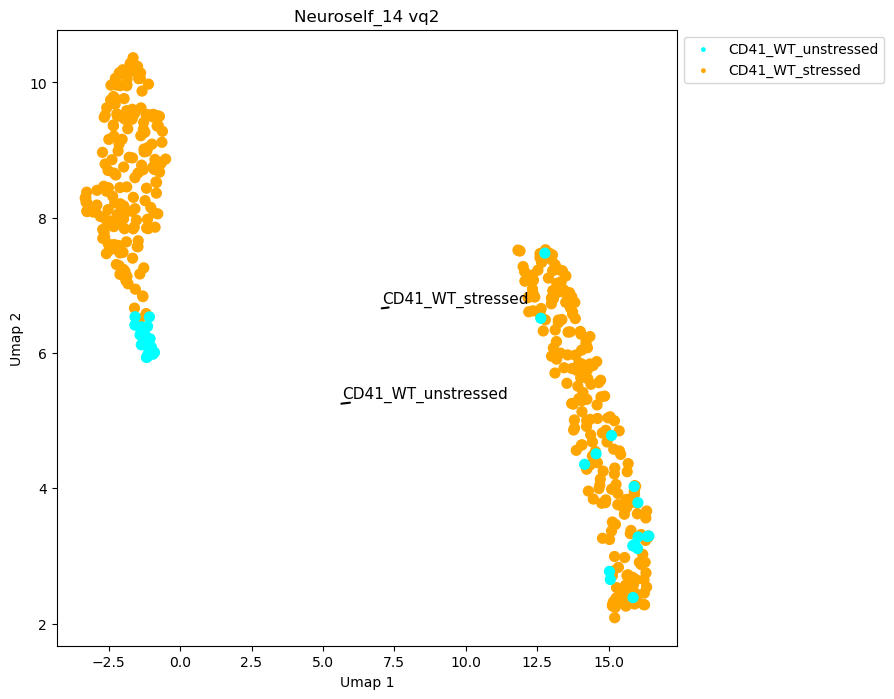

X, y:
(385, 100, 100, 2) (385,)
CLTC_WT_stressed      343
CLTC_WT_unstressed     42
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['CLTC_WT_stressed' 'CLTC_WT_unstressed']
Inferring embedding vectors...
385/385 [==============================] - 69s 178ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:51:34 2022 Construct fuzzy simplicial set
Sun Nov 20 10:51:35 2022 Finding Nearest Neighbors
Sun Nov 20 10:51:35 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:51:35 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:51:37 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 68.80it/s]


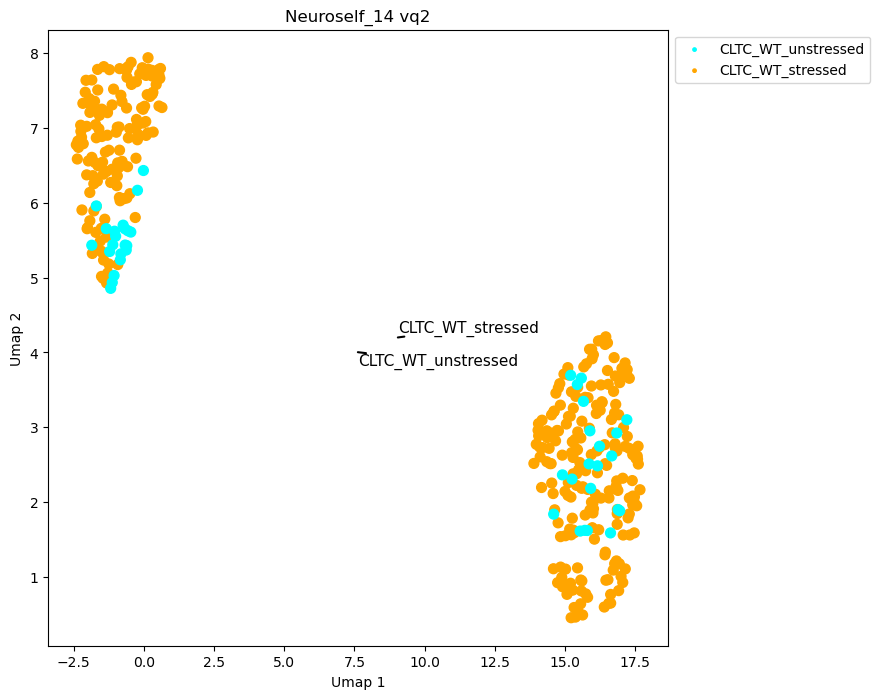

X, y:
(464, 100, 100, 2) (464,)
FMRP_WT_stressed      434
FMRP_WT_unstressed     30
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['FMRP_WT_stressed' 'FMRP_WT_unstressed']
Inferring embedding vectors...
464/464 [==============================] - 78s 168ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:54:54 2022 Construct fuzzy simplicial set
Sun Nov 20 10:54:54 2022 Finding Nearest Neighbors
Sun Nov 20 10:54:55 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:54:55 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:54:57 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 68.69it/s]


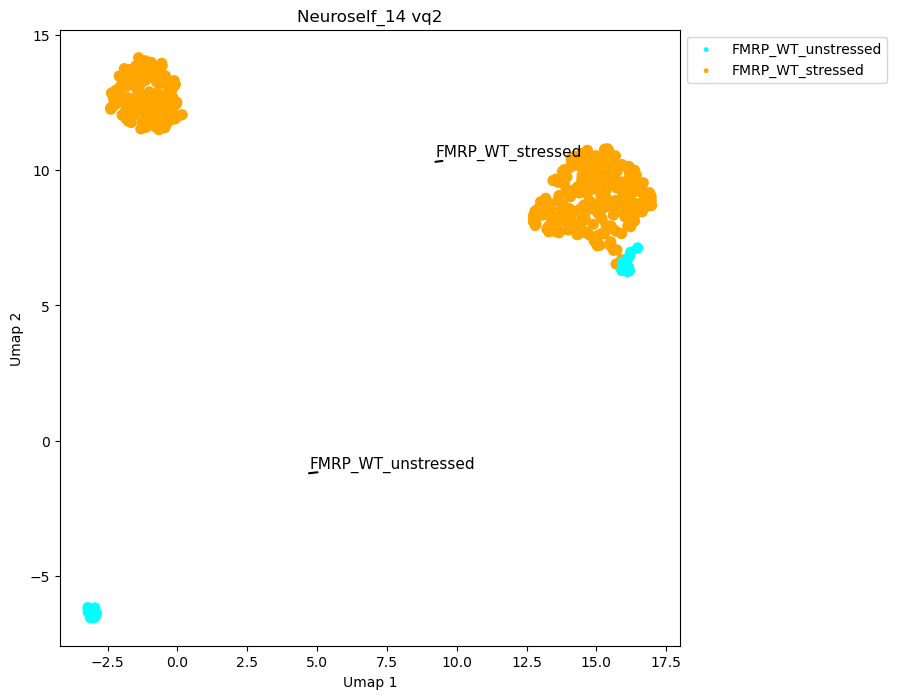

X, y:
(384, 100, 100, 2) (384,)
G3BP1_WT_stressed      349
G3BP1_WT_unstressed     35
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['G3BP1_WT_stressed' 'G3BP1_WT_unstressed']
Inferring embedding vectors...
384/384 [==============================] - 70s 182ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 10:58:12 2022 Construct fuzzy simplicial set
Sun Nov 20 10:58:13 2022 Finding Nearest Neighbors
Sun Nov 20 10:58:13 2022 Finished Nearest Neighbor Search
Sun Nov 20 10:58:13 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 10:58:15 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 77.96it/s]


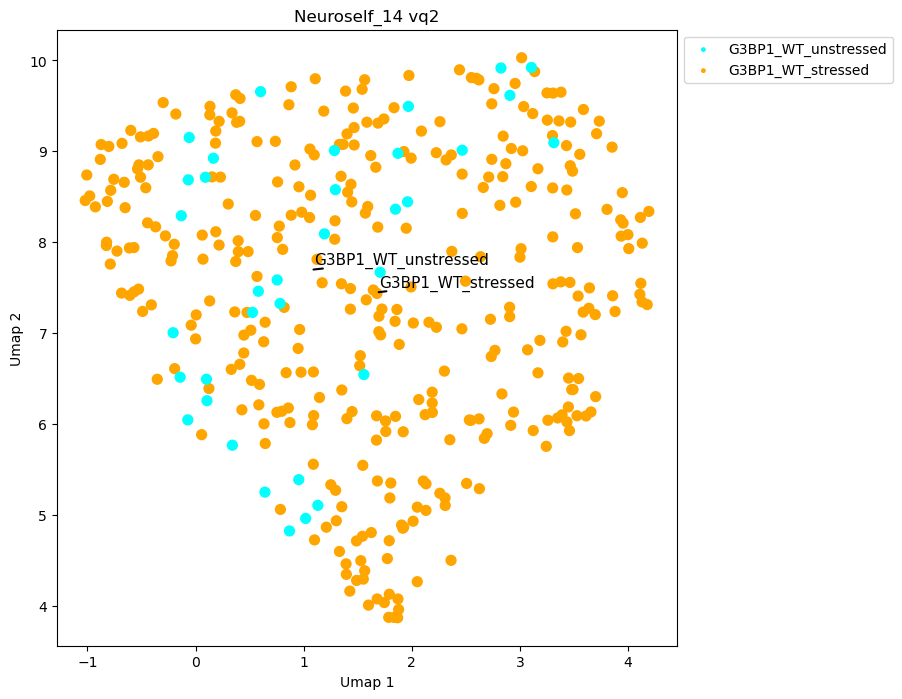

X, y:
(384, 100, 100, 2) (384,)
KIF5A_WT_stressed      349
KIF5A_WT_unstressed     35
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['KIF5A_WT_stressed' 'KIF5A_WT_unstressed']
Inferring embedding vectors...
384/384 [==============================] - 71s 185ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:01:36 2022 Construct fuzzy simplicial set
Sun Nov 20 11:01:37 2022 Finding Nearest Neighbors
Sun Nov 20 11:01:37 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:01:37 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:01:39 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 75.85it/s]


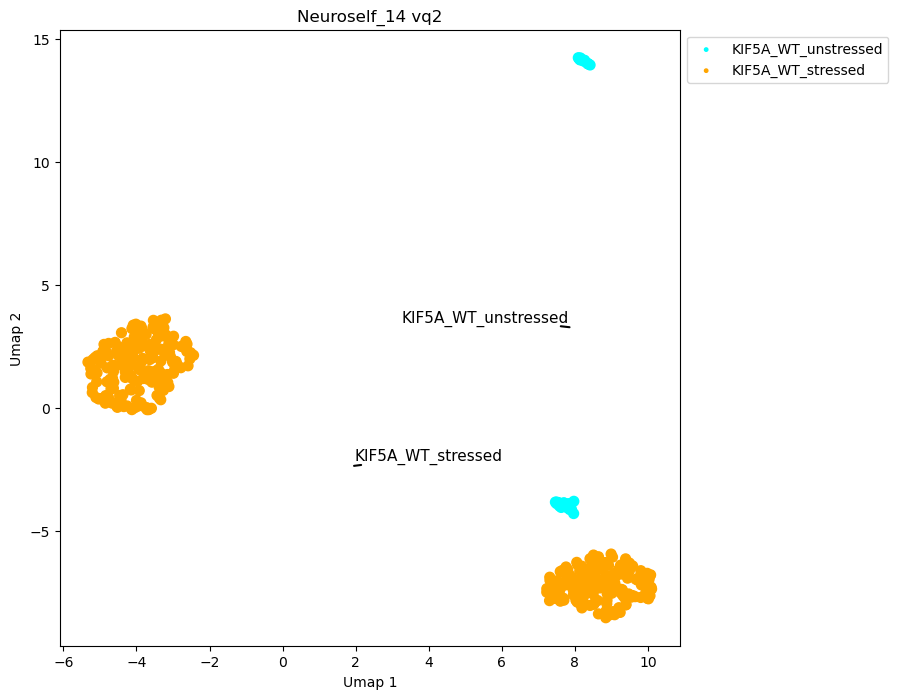

X, y:
(434, 100, 100, 2) (434,)
NONO_WT_stressed      395
NONO_WT_unstressed     39
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['NONO_WT_stressed' 'NONO_WT_unstressed']
Inferring embedding vectors...
434/434 [==============================] - 78s 179ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:05:07 2022 Construct fuzzy simplicial set
Sun Nov 20 11:05:08 2022 Finding Nearest Neighbors
Sun Nov 20 11:05:08 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:05:08 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:05:11 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 76.16it/s]


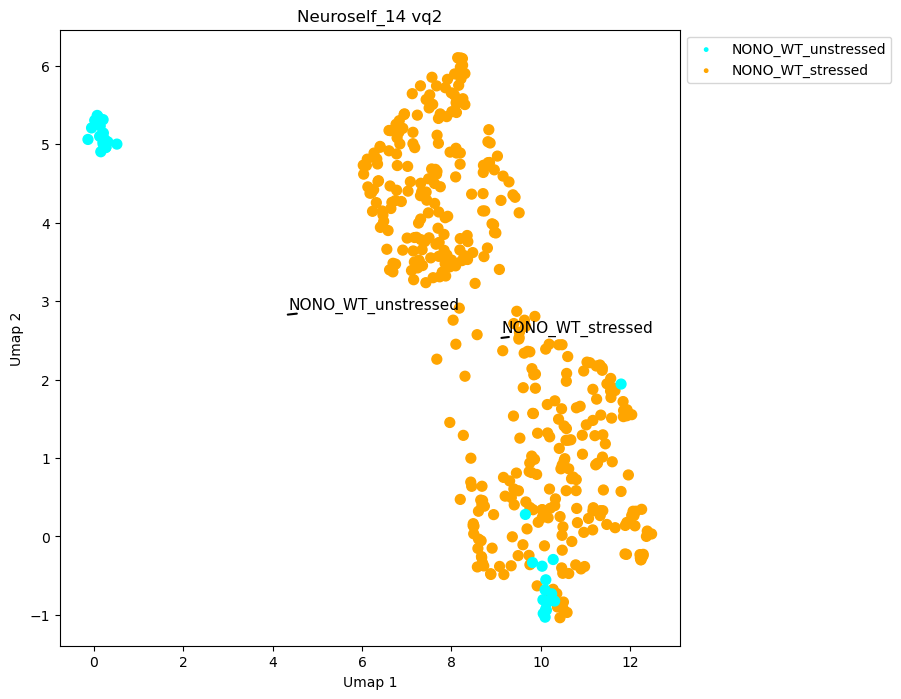

X, y:
(581, 100, 100, 2) (581,)
Phalloidin_WT_stressed      523
Phalloidin_WT_unstressed     58
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['Phalloidin_WT_stressed' 'Phalloidin_WT_unstressed']
Inferring embedding vectors...
581/581 [==============================] - 94s 162ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:09:02 2022 Construct fuzzy simplicial set
Sun Nov 20 11:09:04 2022 Finding Nearest Neighbors
Sun Nov 20 11:09:04 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:09:04 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:09:07 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 68.25it/s]


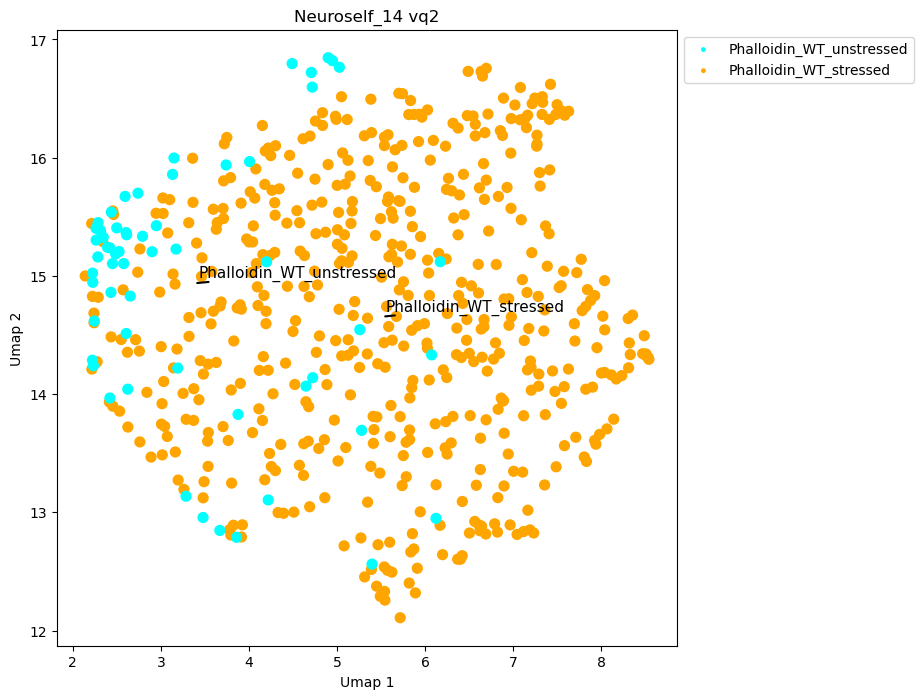

X, y:
(385, 100, 100, 2) (385,)
PSD95_WT_stressed      343
PSD95_WT_unstressed     42
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['PSD95_WT_stressed' 'PSD95_WT_unstressed']
Inferring embedding vectors...
385/385 [==============================] - 75s 195ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:12:44 2022 Construct fuzzy simplicial set
Sun Nov 20 11:12:45 2022 Finding Nearest Neighbors
Sun Nov 20 11:12:45 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:12:45 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:12:47 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 69.63it/s]


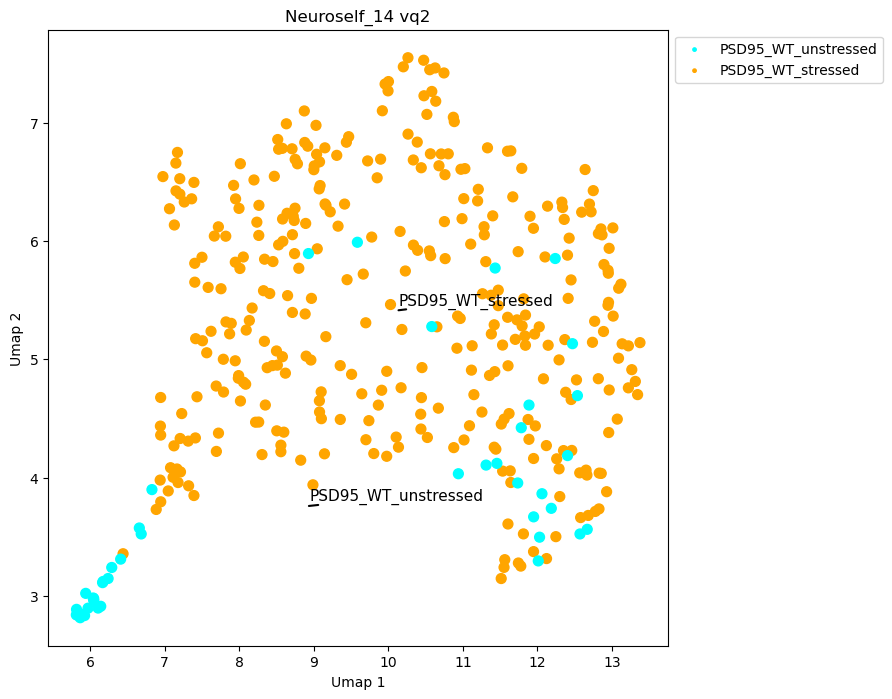

X, y:
(464, 100, 100, 2) (464,)
PURA_WT_stressed      434
PURA_WT_unstressed     30
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['PURA_WT_stressed' 'PURA_WT_unstressed']
Inferring embedding vectors...
464/464 [==============================] - 84s 182ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:16:37 2022 Construct fuzzy simplicial set
Sun Nov 20 11:16:38 2022 Finding Nearest Neighbors
Sun Nov 20 11:16:38 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:16:38 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:16:41 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 72.79it/s]


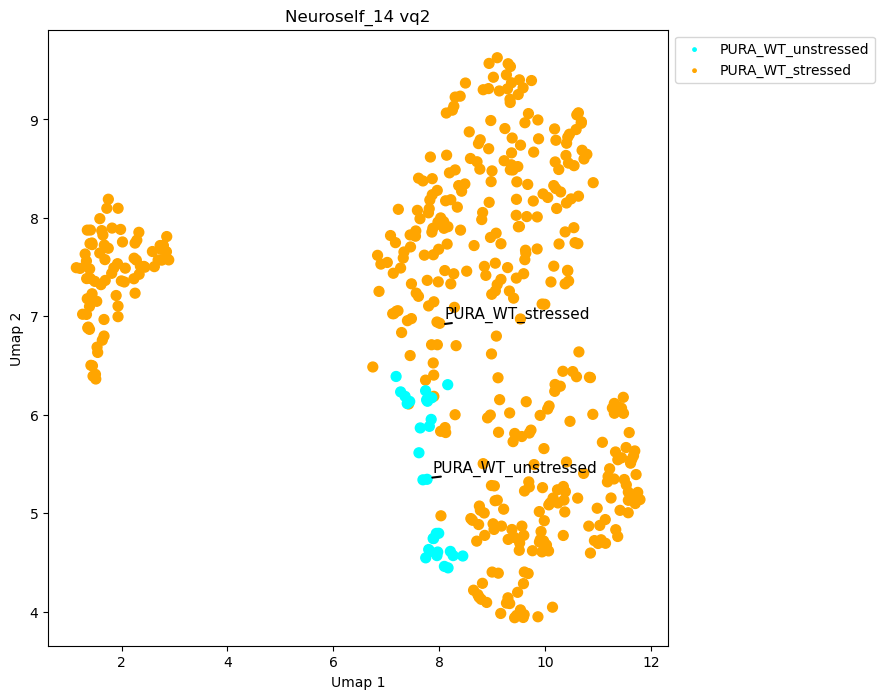

X, y:
(464, 100, 100, 2) (464,)
SQSTM1_WT_stressed      434
SQSTM1_WT_unstressed     30
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['SQSTM1_WT_stressed' 'SQSTM1_WT_unstressed']
Inferring embedding vectors...
464/464 [==============================] - 85s 183ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:20:31 2022 Construct fuzzy simplicial set
Sun Nov 20 11:20:32 2022 Finding Nearest Neighbors
Sun Nov 20 11:20:32 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:20:32 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:20:34 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 76.95it/s]


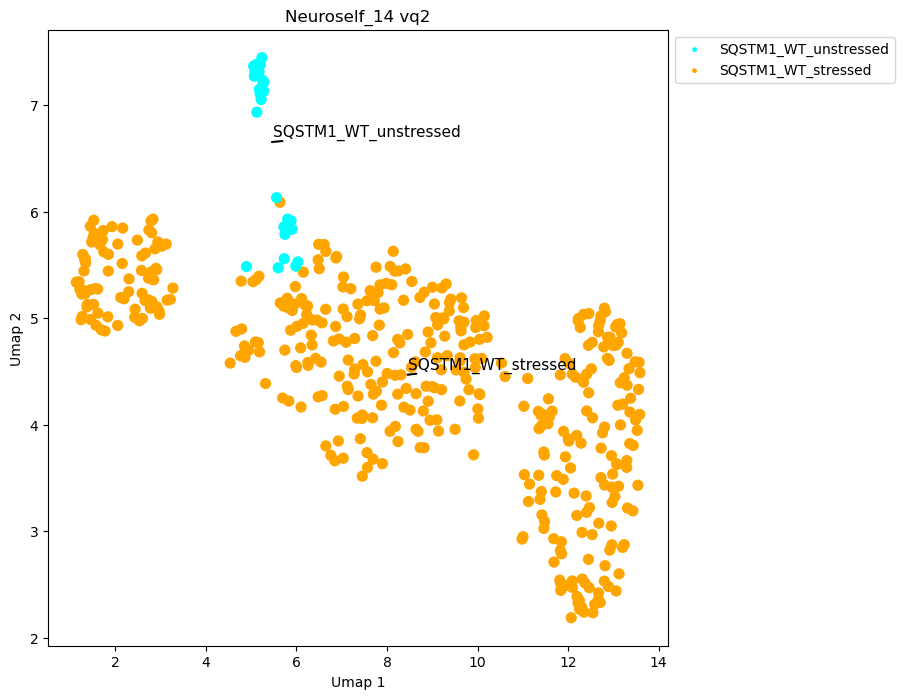

X, y:
(434, 100, 100, 2) (434,)
TDP43_WT_stressed      395
TDP43_WT_unstressed     39
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['TDP43_WT_stressed' 'TDP43_WT_unstressed']
Inferring embedding vectors...
434/434 [==============================] - 83s 191ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:24:32 2022 Construct fuzzy simplicial set
Sun Nov 20 11:24:32 2022 Finding Nearest Neighbors
Sun Nov 20 11:24:32 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:24:32 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:24:35 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 75.84it/s]


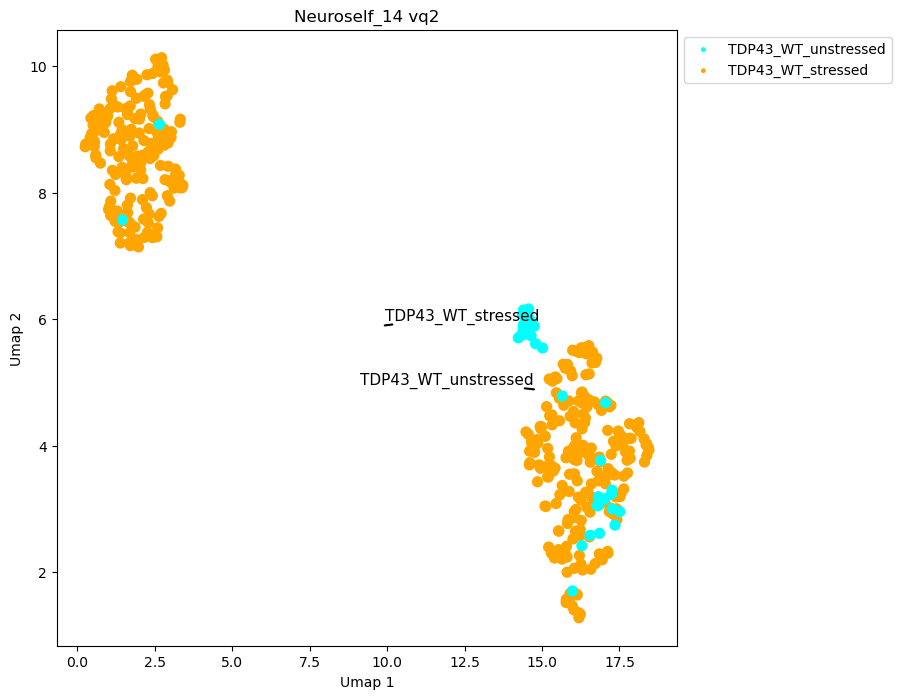

X, y:
(384, 100, 100, 2) (384,)
TIA1_WT_stressed      349
TIA1_WT_unstressed     35
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['TIA1_WT_stressed' 'TIA1_WT_unstressed']
Inferring embedding vectors...
384/384 [==============================] - 79s 206ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:28:31 2022 Construct fuzzy simplicial set
Sun Nov 20 11:28:31 2022 Finding Nearest Neighbors
Sun Nov 20 11:28:31 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:28:31 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:28:34 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 79.87it/s]


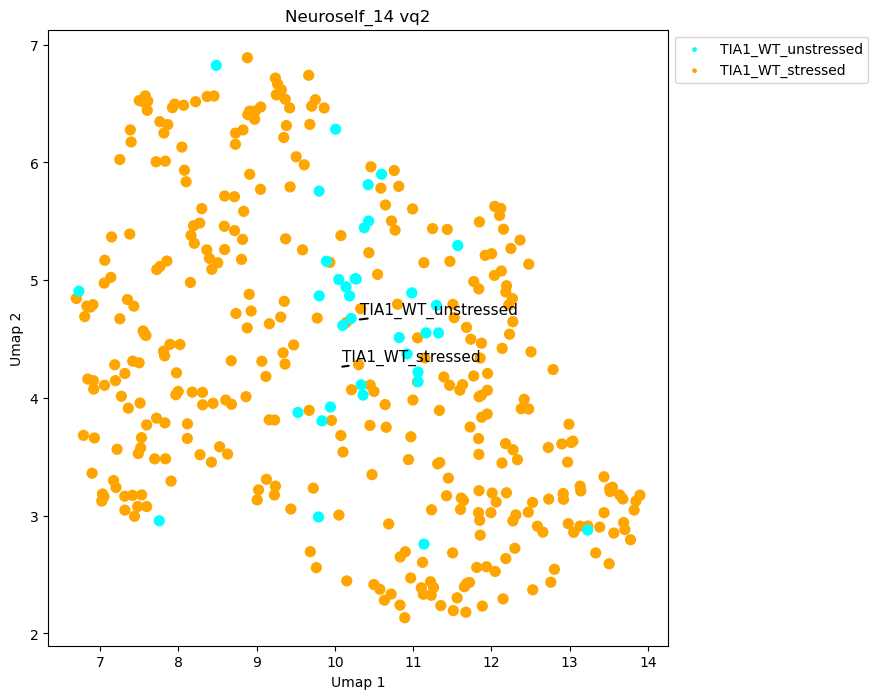

X, y:
(149, 100, 100, 2) (149,)
NEMO_WT_stressed      130
NEMO_WT_unstressed     19
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['NEMO_WT_stressed' 'NEMO_WT_unstressed']
Inferring embedding vectors...
149/149 [==============================] - 55s 370ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:32:08 2022 Construct fuzzy simplicial set
Sun Nov 20 11:32:08 2022 Finding Nearest Neighbors
Sun Nov 20 11:32:08 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:32:08 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:32:09 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 78.22it/s]


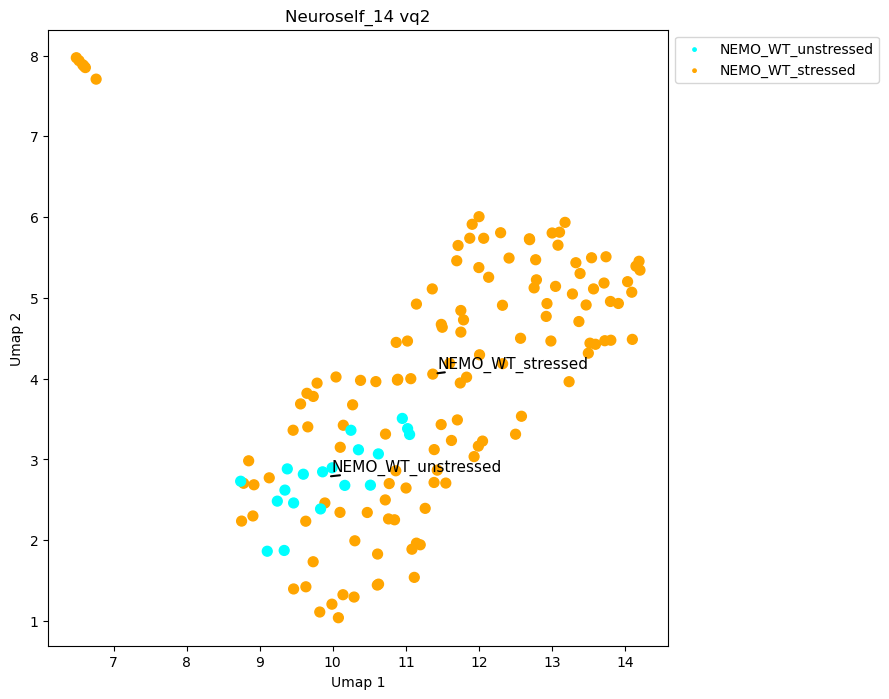

X, y:
(149, 100, 100, 2) (149,)
DCP1A_WT_stressed      130
DCP1A_WT_unstressed     19
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['DCP1A_WT_stressed' 'DCP1A_WT_unstressed']
Inferring embedding vectors...
149/149 [==============================] - 56s 377ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:35:48 2022 Construct fuzzy simplicial set
Sun Nov 20 11:35:48 2022 Finding Nearest Neighbors
Sun Nov 20 11:35:48 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:35:48 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:35:50 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 82.42it/s]


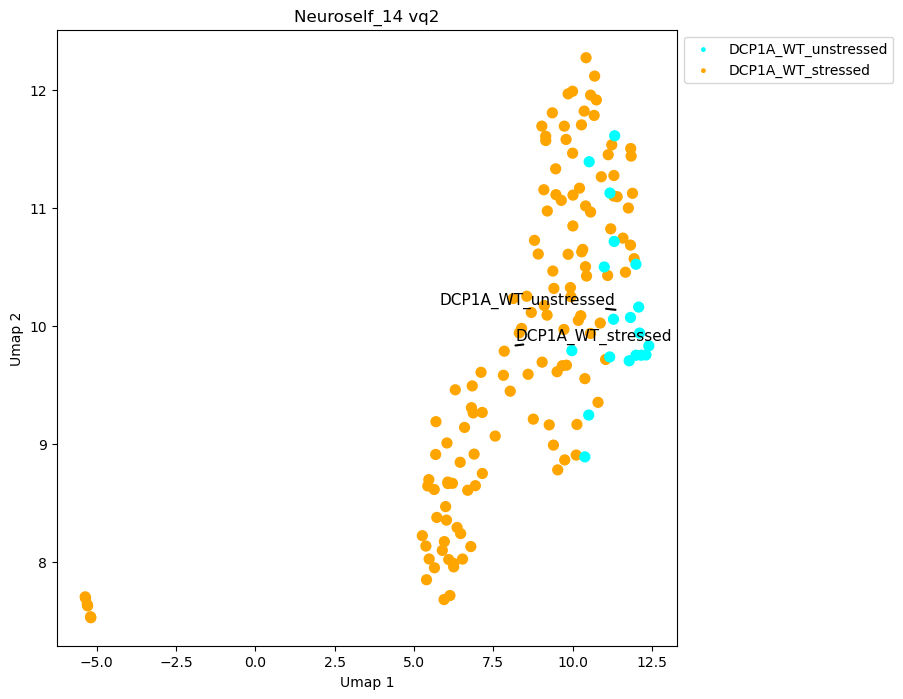

X, y:
(196, 100, 100, 2) (196,)
TOMM20_WT_stressed      180
TOMM20_WT_unstressed     16
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['TOMM20_WT_stressed' 'TOMM20_WT_unstressed']
Inferring embedding vectors...
196/196 [==============================] - 63s 319ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:39:41 2022 Construct fuzzy simplicial set
Sun Nov 20 11:39:41 2022 Finding Nearest Neighbors
Sun Nov 20 11:39:41 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:39:41 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:39:43 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 79.26it/s]


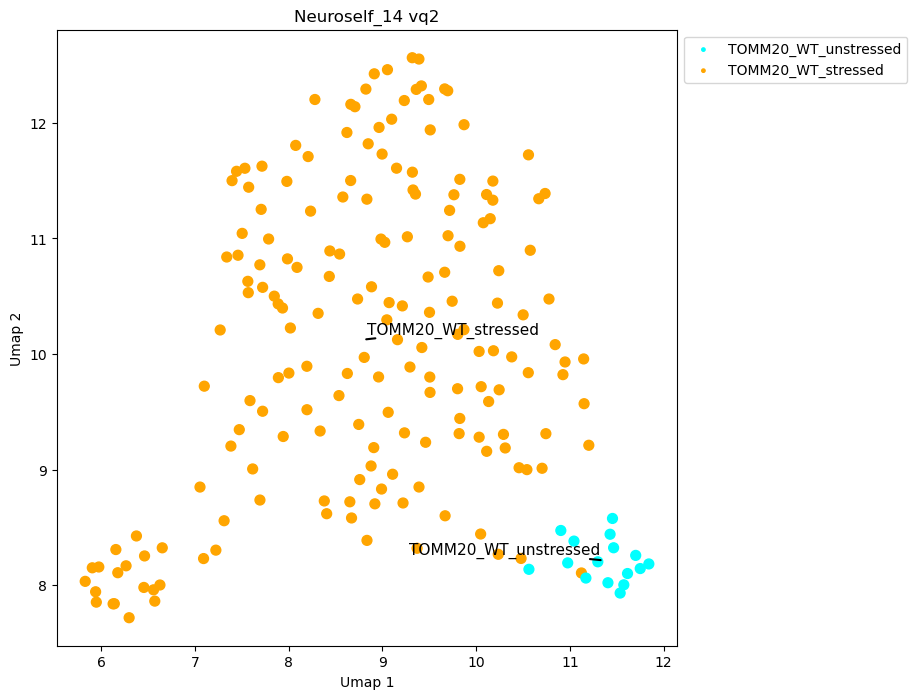

X, y:
(264, 100, 100, 2) (264,)
ANXA11_WT_stressed      243
ANXA11_WT_unstressed     21
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['ANXA11_WT_stressed' 'ANXA11_WT_unstressed']
Inferring embedding vectors...
264/264 [==============================] - 71s 267ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:43:42 2022 Construct fuzzy simplicial set
Sun Nov 20 11:43:42 2022 Finding Nearest Neighbors
Sun Nov 20 11:43:42 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:43:42 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:43:44 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 74.14it/s]


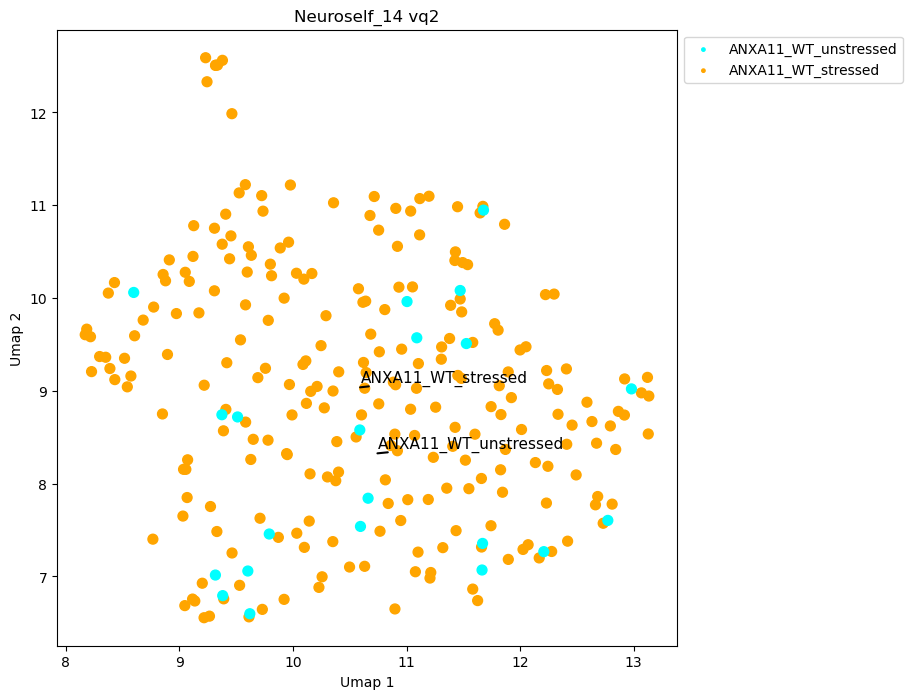

X, y:
(304, 100, 100, 2) (304,)
Calreticulin_WT_stressed      283
Calreticulin_WT_unstressed     21
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['Calreticulin_WT_stressed' 'Calreticulin_WT_unstressed']
Inferring embedding vectors...
304/304 [==============================] - 76s 250ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:47:56 2022 Construct fuzzy simplicial set
Sun Nov 20 11:47:56 2022 Finding Nearest Neighbors
Sun Nov 20 11:47:56 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:47:56 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:47:58 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 78.43it/s]


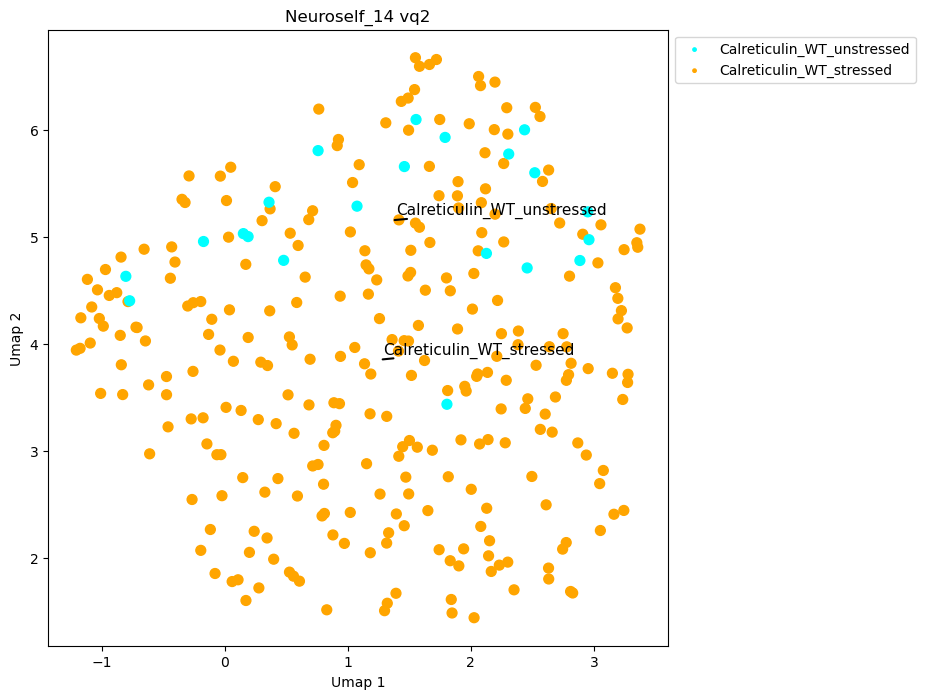

X, y:
(292, 100, 100, 2) (292,)
FUS_WT_stressed      263
FUS_WT_unstressed     29
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['FUS_WT_stressed' 'FUS_WT_unstressed']
Inferring embedding vectors...
292/292 [==============================] - 77s 262ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:52:16 2022 Construct fuzzy simplicial set
Sun Nov 20 11:52:16 2022 Finding Nearest Neighbors
Sun Nov 20 11:52:16 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:52:16 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:52:18 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 77.15it/s]


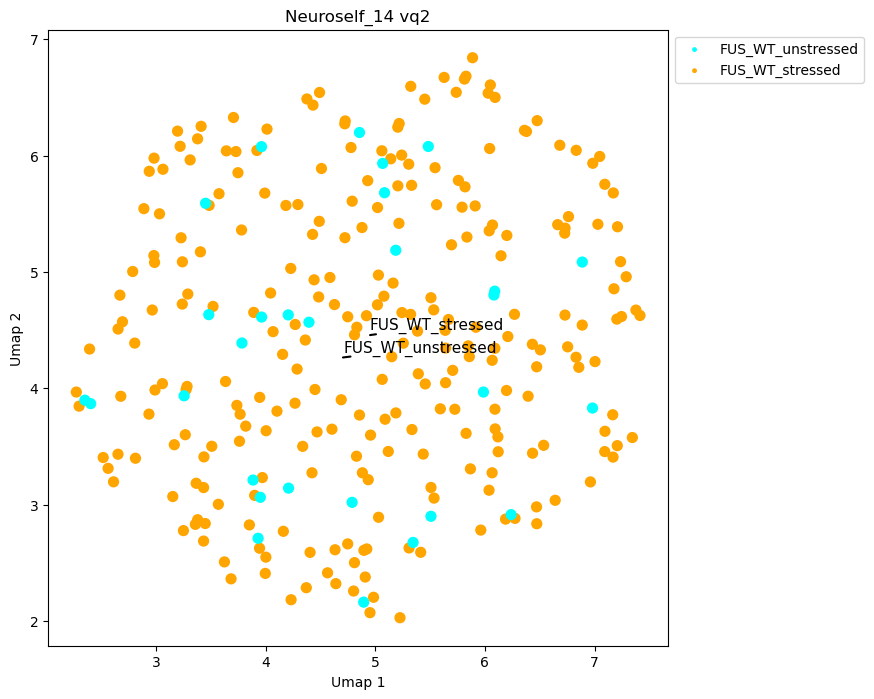

X, y:
(304, 100, 100, 2) (304,)
LAMP1_WT_stressed      283
LAMP1_WT_unstressed     21
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['LAMP1_WT_stressed' 'LAMP1_WT_unstressed']
Inferring embedding vectors...
304/304 [==============================] - 79s 259ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 11:56:43 2022 Construct fuzzy simplicial set
Sun Nov 20 11:56:43 2022 Finding Nearest Neighbors
Sun Nov 20 11:56:43 2022 Finished Nearest Neighbor Search
Sun Nov 20 11:56:43 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 11:56:46 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 68.11it/s]


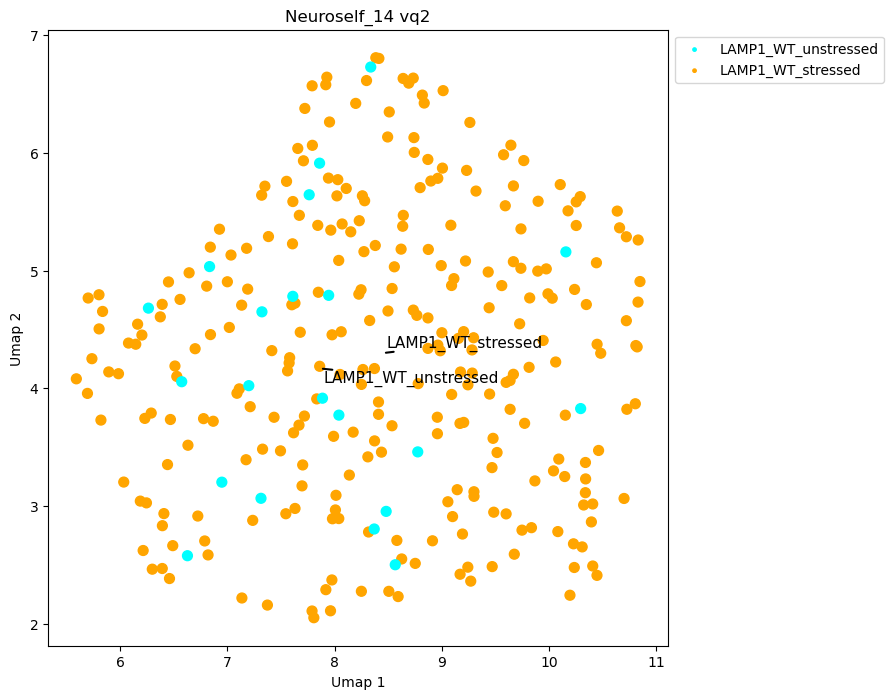

X, y:
(292, 100, 100, 2) (292,)
mitotracker_WT_stressed      263
mitotracker_WT_unstressed     29
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['mitotracker_WT_stressed' 'mitotracker_WT_unstressed']
Inferring embedding vectors...
292/292 [==============================] - 78s 269ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 12:01:15 2022 Construct fuzzy simplicial set
Sun Nov 20 12:01:15 2022 Finding Nearest Neighbors
Sun Nov 20 12:01:15 2022 Finished Nearest Neighbor Search
Sun Nov 20 12:01:15 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 12:01:17 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 78.68it/s]


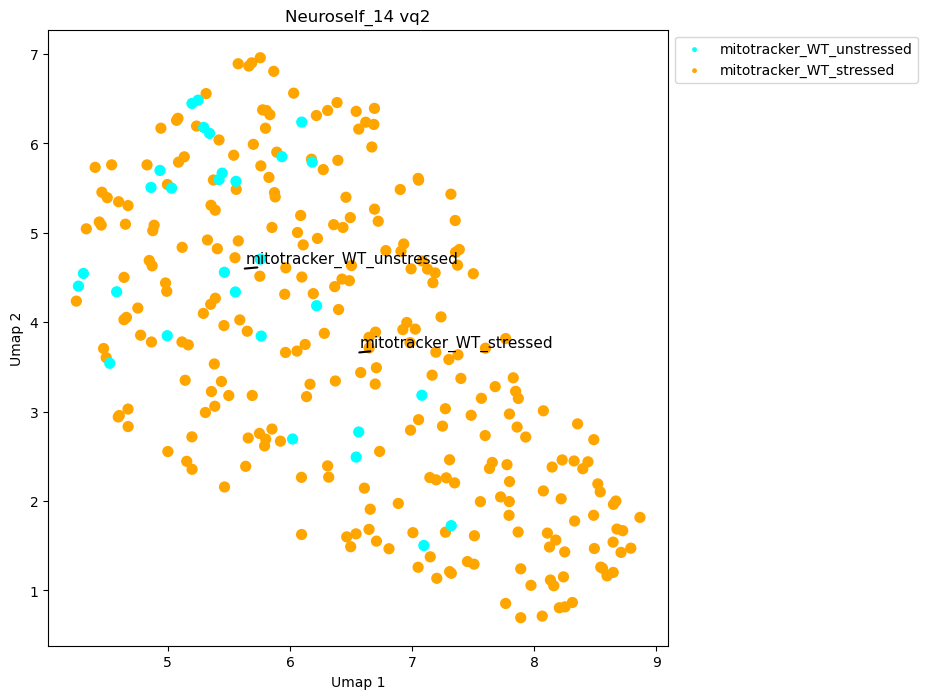

X, y:
(292, 100, 100, 2) (292,)
Nucleolin_WT_stressed      263
Nucleolin_WT_unstressed     29
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['Nucleolin_WT_stressed' 'Nucleolin_WT_unstressed']
Inferring embedding vectors...
292/292 [==============================] - 79s 270ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 12:05:48 2022 Construct fuzzy simplicial set
Sun Nov 20 12:05:48 2022 Finding Nearest Neighbors
Sun Nov 20 12:05:48 2022 Finished Nearest Neighbor Search
Sun Nov 20 12:05:48 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 12:05:50 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 80.17it/s]


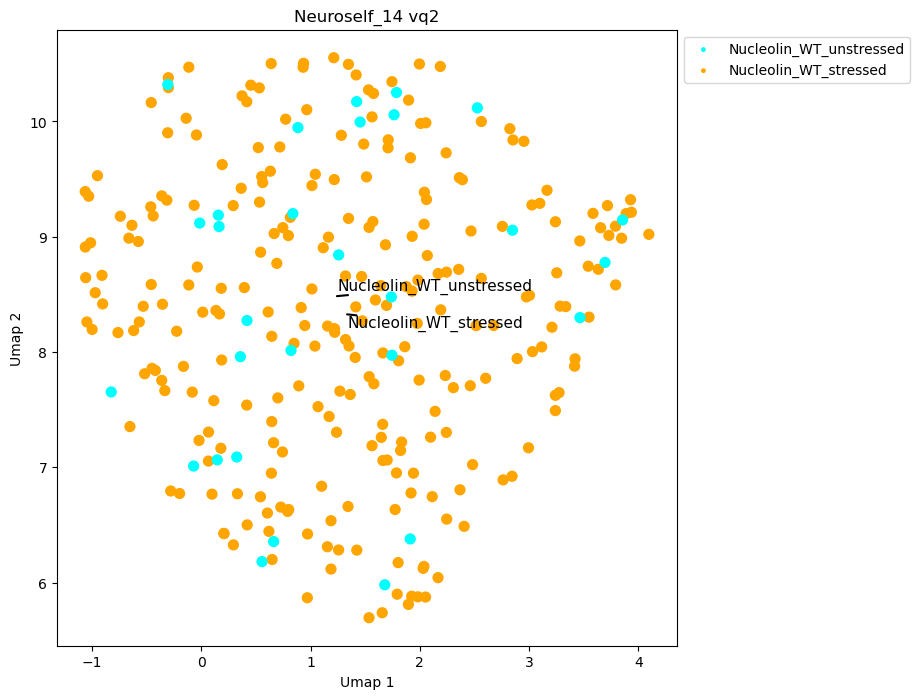

X, y:
(264, 100, 100, 2) (264,)
SNCA_WT_stressed      243
SNCA_WT_unstressed     21
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['SNCA_WT_stressed' 'SNCA_WT_unstressed']
Inferring embedding vectors...
264/264 [==============================] - 78s 294ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 12:10:24 2022 Construct fuzzy simplicial set
Sun Nov 20 12:10:24 2022 Finding Nearest Neighbors
Sun Nov 20 12:10:24 2022 Finished Nearest Neighbor Search
Sun Nov 20 12:10:24 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 12:10:26 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 80.87it/s]


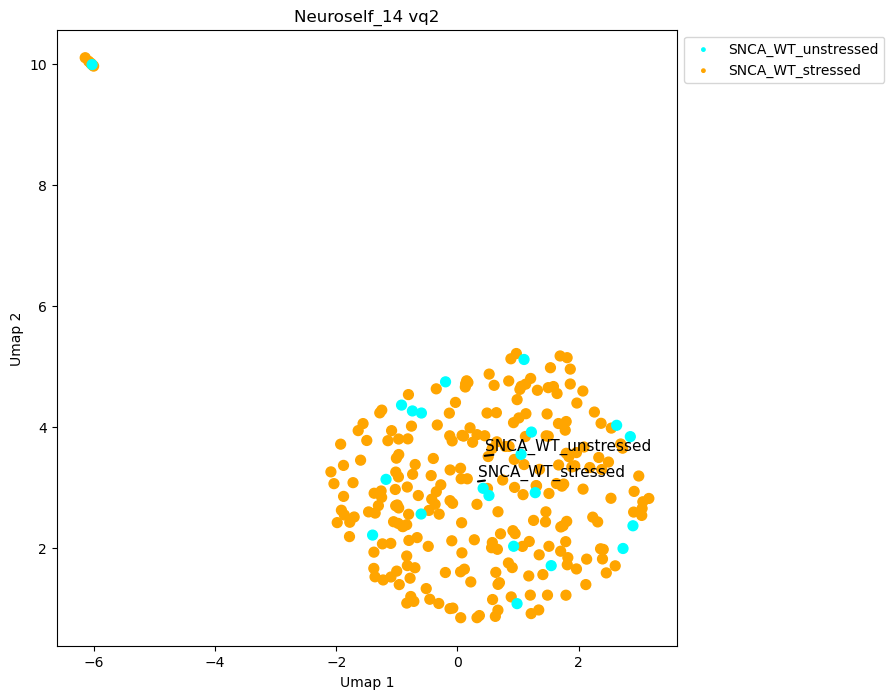

X, y:
(204, 100, 100, 2) (204,)
GM130_WT_stressed      177
GM130_WT_unstressed     27
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['GM130_WT_stressed' 'GM130_WT_unstressed']
Inferring embedding vectors...
204/204 [==============================] - 72s 354ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 12:15:00 2022 Construct fuzzy simplicial set
Sun Nov 20 12:15:00 2022 Finding Nearest Neighbors
Sun Nov 20 12:15:00 2022 Finished Nearest Neighbor Search
Sun Nov 20 12:15:00 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 12:15:02 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 79.88it/s]


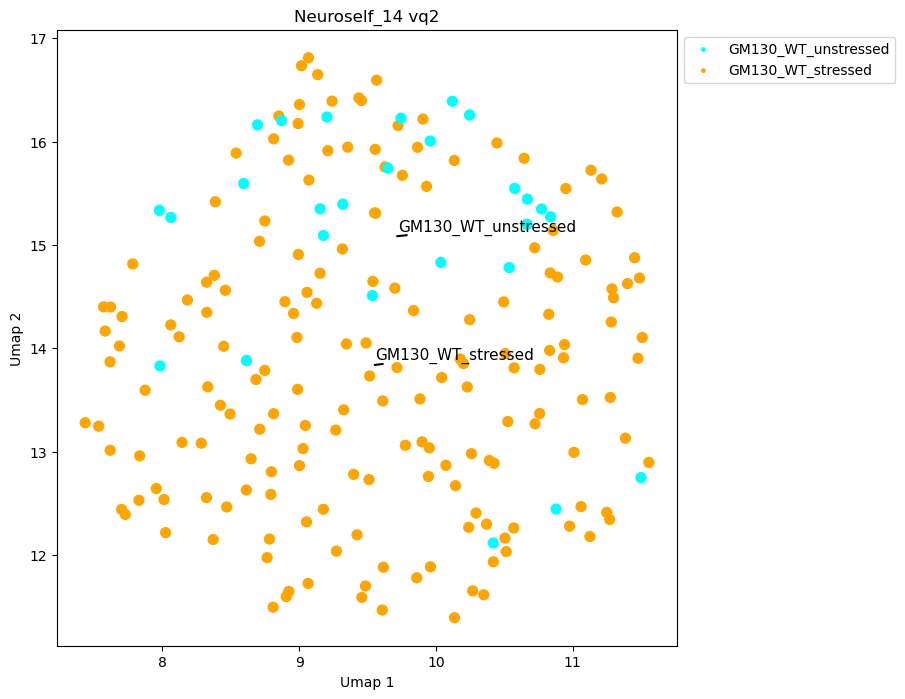

X, y:
(261, 100, 100, 2) (261,)
PEX14_WT_stressed      237
PEX14_WT_unstressed     24
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['PEX14_WT_stressed' 'PEX14_WT_unstressed']
Inferring embedding vectors...
261/261 [==============================] - 80s 305ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 12:19:43 2022 Construct fuzzy simplicial set
Sun Nov 20 12:19:43 2022 Finding Nearest Neighbors
Sun Nov 20 12:19:43 2022 Finished Nearest Neighbor Search
Sun Nov 20 12:19:43 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 12:19:45 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 73.99it/s]


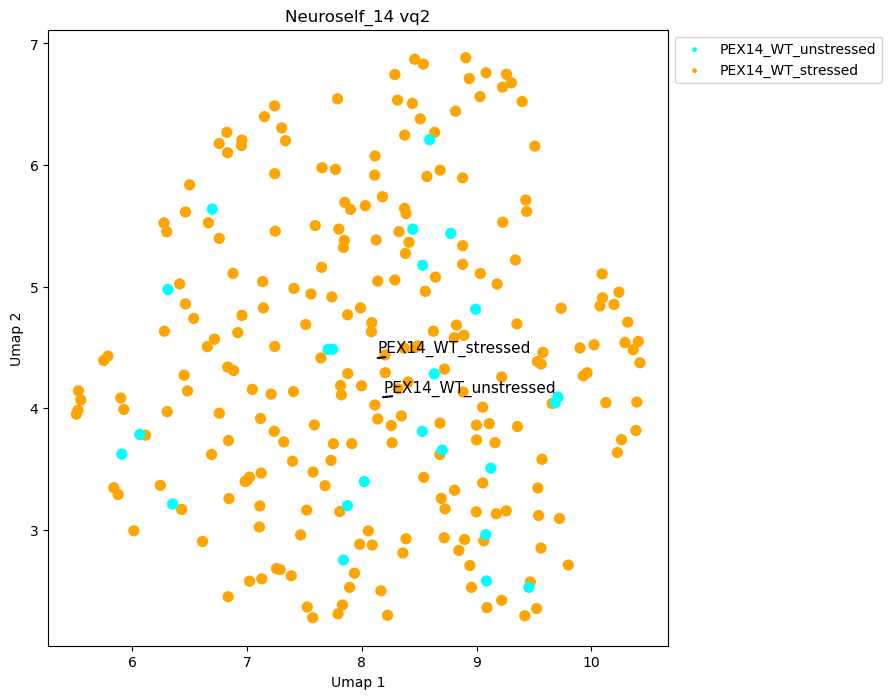

X, y:
(261, 100, 100, 2) (261,)
PML_WT_stressed      237
PML_WT_unstressed     24
dtype: int64
Creating the model


All files will be saved at model_outputs/


Loading weights
./models/model_ep0085_only_WT.h5
is loaded.
Ground truth:
['PML_WT_stressed' 'PML_WT_unstressed']
Inferring embedding vectors...
261/261 [==============================] - 81s 312ms/sample
Computing UMAP...
UMAP(random_state=1, verbose=True)
Sun Nov 20 12:24:37 2022 Construct fuzzy simplicial set
Sun Nov 20 12:24:37 2022 Finding Nearest Neighbors
Sun Nov 20 12:24:37 2022 Finished Nearest Neighbor Search
Sun Nov 20 12:24:37 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov 20 12:24:39 2022 Finished embedding
Plotting umap_gt subplot1 ...


100%|██████████| 2/2 [00:00<00:00, 74.30it/s]


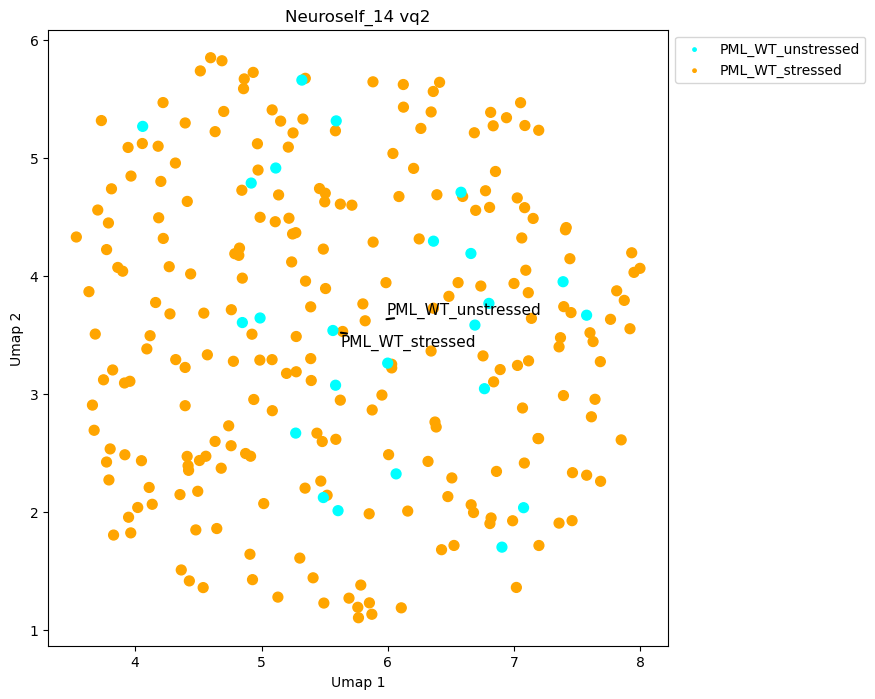

In [11]:
# Model 14
images, labels, labels_changepoints, markers_order = load_data(input_folders, markers=markers,condition_l=True,
                                                               type_l=True,verbose=False,split_by_set=True,
                                                               cell_lines_include=["WT"],set_type='test',
                                                               split_by_set_include=("WT", "unstressed"))
labels_s = pd.Series(labels.reshape(-1,))
for m in markers:
    markers_indexes = labels_s[labels_s.str.contains(m)].index
    images_subset = images[markers_indexes]
    labels_subset = labels[markers_indexes]
    colors_dict = get_colors_dict(labels_subset)
    analytics_neuroself_XIV = get_analytics(images_subset, labels_subset, model_path="./models/model_ep0085_only_WT.h5")
    umap_vec, _ = plot_umap(analytics_neuroself_XIV, titles='Neuroself_14',colors_dict=colors_dict,
                           output_filename=f"model14_{m}_WT",s=50)